<a href="https://colab.research.google.com/github/nyeinnst/bigdata/blob/master/MCNEMAR_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount & Imports

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt') 
nb_path = '/content/notebooks'
#create a symbolic link for pointing to /content/mnt/My Drive/Colab Notebooks
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path) 

Mounted at /content/mnt


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_fscore_support 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import brier_score_loss
import itertools 
%matplotlib inline

Data: [Google Drive with csv files](https://drive.google.com/drive/folders/1qTZwbJU_jSZsJAczIcfb6-uUkQqLcKeS?usp=sharing) <br /> (Note: "results.csv" contains all data from the other csv files)

# Data Preparation

Removes 2019-09-23 from the dataframe

In [ ]:
# Edge Adjusted 8b
ea8b = pd.DataFrame(pd.read_csv('/content/mnt/My Drive/SCO_Mekong_Water_Disasters/Mekong_Services/S1_TF_Workspace/exports/edge-adjusted-8b.csv')).rename(columns={'WaterPlane':'actual','water':'model'})
# remove date with 2019-09-23
ea8b = ea8b[ea8b['system:time_start'] != '2019-09-23T07:00:00']
# display(ea8b)
display(ea8b.size)

# Edge Adjusted 9c
ea9c = pd.DataFrame(pd.read_csv('/content/mnt/My Drive/SCO_Mekong_Water_Disasters/Mekong_Services/S1_TF_Workspace/exports/edge-adjusted-9c.csv')).rename(columns={'WaterPlane':'actual','water':'model'})
# remove date with 2019-09-23
ea9c = ea9c[ea9c['system:time_start'] != '2019-09-23T07:00:00']
display(ea9c.size)

# Edge Adjusted a0
eaa0 = pd.DataFrame(pd.read_csv('/content/mnt/My Drive/SCO_Mekong_Water_Disasters/Mekong_Services/S1_TF_Workspace/exports/edge-adjusted-a0.csv')).rename(columns={'WaterPlane':'actual','water':'model'})
# remove date with 2019-09-23
eaa0 = eaa0[eaa0['system:time_start'] != '2019-09-23T07:00:00']
display(eaa0.size)

# Edge Fixed 42
ef42 = pd.DataFrame(pd.read_csv('/content/mnt/My Drive/SCO_Mekong_Water_Disasters/Mekong_Services/S1_TF_Workspace/exports/edge-fixed-42.csv')).rename(columns={'WaterPlane':'actual','water':'model'})
# remove date with 2019-09-23
ef42 = ef42[ef42['system:time_start'] != '2019-09-23T07:00:00']
display(ef42.size)

# Edge Fixed 52
ef52 = pd.DataFrame(pd.read_csv('/content/mnt/My Drive/SCO_Mekong_Water_Disasters/Mekong_Services/S1_TF_Workspace/exports/edge-fixed-52.csv')).rename(columns={'WaterPlane':'actual','water':'model'})
# remove date with 2019-09-23
ef52 = ef52[ef52['system:time_start'] != '2019-09-23T07:00:00']
display(ef52.size)

# Edge Fixed df
efdf = pd.DataFrame(pd.read_csv('/content/mnt/My Drive/SCO_Mekong_Water_Disasters/Mekong_Services/S1_TF_Workspace/exports/edge-fixed-df.csv')).rename(columns={'WaterPlane':'actual','water':'model'})
# remove date with 2019-09-23
efdf = efdf[efdf['system:time_start'] != '2019-09-23T07:00:00']
display(efdf.size)

# JRC Adjusted 6b
ja6b = pd.DataFrame(pd.read_csv('/content/mnt/My Drive/SCO_Mekong_Water_Disasters/Mekong_Services/S1_TF_Workspace/exports/jrc-adjusted-6b.csv')).rename(columns={'WaterPlane':'actual','water':'model'})
# remove date with 2019-09-23
ja6b = ja6b[ja6b['system:time_start'] != '2019-09-23T07:00:00']
display(ja6b.size)

# JRC Adjusted ce
jace = pd.DataFrame(pd.read_csv('/content/mnt/My Drive/SCO_Mekong_Water_Disasters/Mekong_Services/S1_TF_Workspace/exports/jrc-adjusted-ce.csv')).rename(columns={'WaterPlane':'actual','water':'model'})
# remove date with 2019-09-23
jace = jace[jace['system:time_start'] != '2019-09-23T07:00:00']
display(jace.size)

# JRC Adjusted f8
jaf8 = pd.DataFrame(pd.read_csv('/content/mnt/My Drive/SCO_Mekong_Water_Disasters/Mekong_Services/S1_TF_Workspace/exports/jrc-adjusted-f8.csv')).rename(columns={'WaterPlane':'actual','water':'model'})
# remove date with 2019-09-23
jaf8 = jaf8[jaf8['system:time_start'] != '2019-09-23T07:00:00']
display(jaf8.size)

# JRC Fixed 2e
jf2e = pd.DataFrame(pd.read_csv('/content/mnt/My Drive/SCO_Mekong_Water_Disasters/Mekong_Services/S1_TF_Workspace/exports/jrc-fixed-2e.csv')).rename(columns={'WaterPlane':'actual','water':'model'})
# remove date with 2019-09-23
jf2e = jf2e[jf2e['system:time_start'] != '2019-09-23T07:00:00']
display(jf2e.size)

# JRC Fixed 39
jf39 = pd.DataFrame(pd.read_csv('/content/mnt/My Drive/SCO_Mekong_Water_Disasters/Mekong_Services/S1_TF_Workspace/exports/jrc-fixed-39.csv')).rename(columns={'WaterPlane':'actual','water':'model'})
# remove date with 2019-09-23
jf39 = jf39[jf39['system:time_start'] != '2019-09-23T07:00:00']
display(jf39.size)

# JRC Fixed fa
jffa = pd.DataFrame(pd.read_csv('/content/mnt/My Drive/SCO_Mekong_Water_Disasters/Mekong_Services/S1_TF_Workspace/exports/jrc-fixed-fa.csv')).rename(columns={'WaterPlane':'actual','water':'model'})
# remove date with 2019-09-23
jffa = jffa[jffa['system:time_start'] != '2019-09-23T07:00:00']
display(jffa.size)

2825

2825

2825

2825

2825

2825

2825

2825

2825

2825

2825

2825

## Export the edge and jrc datasets to perform analysis

In [ ]:
edge_data = [eaa0,ea9c,ea8b,ef42,efdf,ef52]
edge_names = ['Edge Adjusted bce','Edge Adjusted dice','Edge Adjusted bce_dice',
              'Edge Fixed bce', 'Edge Fixed dice','Edge Fixed bce_dice']
dates = list(jffa['system:time_start'].unique())

edge_list_df = []
for table, name in zip(edge_data, edge_names):
  level1, level2, level3 = name.split(" ")
  for _index, _date in enumerate(dates):
    t = table.loc[table['system:time_start']==_date]
    _date = _date.split('T')[0]
    export_df = pd.DataFrame({
        f'level1': level1,
        f'level2': level2,
        f'level3': level3,
        # f'actual_d{_index+1}': t['actual'],
        # f'edge_map_d{_index+1}': np.where(t['model']>=0.5,1,0),
        f'actual_{_date}': t['actual'],
        f'edge_map_{_date}': np.where(t['model']>=0.5,1,0)
    })
    edge_list_df.append(export_df)

edge_list_df = pd.concat(edge_list_df)
edge_list_df.head(300)
# edge_list_df.to_csv(f'/content/mnt/My Drive/SCO_Mekong_Water_Disasters/Mekong_Services/S1_TF_Workspace/exports/mcnemar_testing/edge_export_4_mcnemar.csv')

,level1,level2,level3,actual_2019-09-09,edge_map_2019-09-09,actual_2019-09-11,edge_map_2019-09-11,actual_2019-10-03,edge_map_2019-10-03,actual_2019-10-05,edge_map_2019-10-05,actual_2019-10-15,edge_map_2019-10-15
0,Edge,Adjusted,bce,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Edge,Adjusted,bce,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Edge,Adjusted,bce,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Edge,Adjusted,bce,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Edge,Adjusted,bce,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,Edge,Adjusted,bce,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
399,Edge,Adjusted,bce,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
400,Edge,Adjusted,bce,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
401,Edge,Adjusted,bce,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN


In [ ]:
jrc_data = [ja6b,jace,jaf8,jf2e,jf39,jffa]
jrc_names = ['JRC Adjusted bce', 'JRC Adjusted dice', 'JRC Adjusted bce_dice',
             'JRC Fixed bce', 'JRC Fixed dice', 'JRC Fixed bce_dice']
dates = list(jffa['system:time_start'].unique())

jrc_list_df = []
for table, name in zip(jrc_data, jrc_names):
  level1, level2, level3 = name.split(" ")
  for _index, _date in enumerate(dates):
    t = table.loc[table['system:time_start']==_date]
    _date = _date.split('T')[0]
    export_df = pd.DataFrame({
        f'level1': level1,
        f'level2': level2,
        f'level3': level3,
        # f'actual_d{_index+1}': t['actual'],
        # f'jrc_map_d{_index+1}': np.where(t['model']>=0.5,1,0),
        f'actual_{_date}': t['actual'],
        f'jrc_map_{_date}': np.where(t['model']>=0.5,1,0)
    })
    jrc_list_df.append(export_df)

jrc_list_df = pd.concat(jrc_list_df)
# jrc_list_df.to_csv(f'/content/mnt/My Drive/SCO_Mekong_Water_Disasters/Mekong_Services/S1_TF_Workspace/exports/mcnemar_testing/jrc_export_4_mcnemar.csv')

# Data Analysis

## Main Variables

In [ ]:
jrc_data = pd.DataFrame(pd.read_csv('/content/mnt/My Drive/SCO_Mekong_Water_Disasters/Mekong_Services/S1_TF_Workspace/exports/mcnemar_testing/jrc_export_4_mcnemar.csv'))
edge_data = pd.DataFrame(pd.read_csv('/content/mnt/My Drive/SCO_Mekong_Water_Disasters/Mekong_Services/S1_TF_Workspace/exports/mcnemar_testing/edge_export_4_mcnemar.csv'))

# variables
actual = 'actual'
edge_modeled = 'edge_map'
jrc_modeled = 'jrc_map'
date1 = '2019-09-09'
date2 = '2019-09-11'
date3 = '2019-10-03'
date4 = '2019-10-05'
date5 = '2019-10-15'

_edge = (edge_data['level1'] == 'Edge')
_edge_adjusted = (edge_data['level2'] == 'Adjusted')
_edge_fixed = (edge_data['level2'] == 'Fixed')
_jrc = (jrc_data['level1'] == 'JRC')
_jrc_adjusted = (jrc_data['level2'] == 'Adjusted')
_jrc_fixed = (jrc_data['level2'] == 'Fixed')

# get all the 12 data
# adjusted bce
ea_bce = edge_data[_edge & _edge_adjusted & (edge_data['level3'] == 'bce')]
ja_bce = jrc_data[_jrc & _jrc_adjusted & (jrc_data['level3'] == 'bce')]
# adjusted dice
ea_dice = edge_data[_edge & _edge_adjusted & (edge_data['level3'] == 'dice')]
ja_dice = jrc_data[_jrc & _jrc_adjusted & (jrc_data['level3'] == 'dice')]
# adjusted bce dice
ea_bce_dice = edge_data[_edge & _edge_adjusted & (edge_data['level3'] == 'bce_dice')]
ja_bce_dice = jrc_data[_jrc & _jrc_adjusted & (jrc_data['level3'] == 'bce_dice')]
# fixed bce
ef_bce = edge_data[_edge & _edge_fixed & (edge_data['level3'] == 'bce')]
jf_bce = jrc_data[_jrc & _jrc_fixed & (jrc_data['level3'] == 'bce')]
# fixed dice
ef_dice = edge_data[_edge & _edge_fixed & (edge_data['level3'] == 'dice')]
jf_dice = jrc_data[_jrc & _jrc_fixed & (jrc_data['level3'] == 'dice')]
# fixed bce dice
ef_bce_dice = edge_data[_edge & _edge_fixed & (edge_data['level3'] == 'bce_dice')]
jf_bce_dice = jrc_data[_jrc & _jrc_fixed & (jrc_data['level3'] == 'bce_dice')]

## Labels

### Adjusted BCE


In [ ]:
##############################################################################
# edge adjusted bce and jrc adjusted bce labels are same                     #
##############################################################################
date1_actual = ea_bce[ea_bce[f'{actual}_{date1}'].notna()][f'{actual}_{date1}']
date2_actual = ea_bce[ea_bce[f'{actual}_{date2}'].notna()][f'{actual}_{date2}']
date3_actual = ea_bce[ea_bce[f'{actual}_{date3}'].notna()][f'{actual}_{date3}']
date4_actual = ea_bce[ea_bce[f'{actual}_{date4}'].notna()][f'{actual}_{date4}']
date5_actual = ea_bce[ea_bce[f'{actual}_{date5}'].notna()][f'{actual}_{date5}']
actual_a_bce = pd.concat([date1_actual, date2_actual, date3_actual,
                          date4_actual, date5_actual], axis=0)
display(actual_a_bce.size)
display(actual_a_bce)
actual_a_bce_array = np.array(actual_a_bce)

565

0      0.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
560    0.0
561    0.0
562    1.0
563    1.0
564    1.0
Length: 565, dtype: float64

### Adjusted Dice

In [ ]:
##############################################################################
# edge adjusted dice and jrc adjusted dice labels are same                   #
##############################################################################
date1_actual = ea_dice[ea_dice[f'{actual}_{date1}'].notna()][f'{actual}_{date1}']
date2_actual = ea_dice[ea_dice[f'{actual}_{date2}'].notna()][f'{actual}_{date2}']
date3_actual = ea_dice[ea_dice[f'{actual}_{date3}'].notna()][f'{actual}_{date3}']
date4_actual = ea_dice[ea_dice[f'{actual}_{date4}'].notna()][f'{actual}_{date4}']
date5_actual = ea_dice[ea_dice[f'{actual}_{date5}'].notna()][f'{actual}_{date5}']
actual_a_dice = pd.concat([date1_actual, date2_actual, date3_actual, date4_actual, date5_actual], axis=0)
display(actual_a_dice.size)
display(actual_a_dice)
actual_a_dice_array = np.array(actual_a_dice)

565

565     0.0
566     1.0
567     1.0
568     1.0
569     1.0
       ... 
1125    0.0
1126    0.0
1127    1.0
1128    1.0
1129    1.0
Length: 565, dtype: float64

### Adjusted BCE Dice

In [ ]:
##############################################################################
# edge adjusted bce dice and jrc adjusted bce dice labels are same           #
##############################################################################
date1_actual = ea_bce_dice[ea_bce_dice[f'{actual}_{date1}'].notna()][f'{actual}_{date1}']
date2_actual = ea_bce_dice[ea_bce_dice[f'{actual}_{date2}'].notna()][f'{actual}_{date2}']
date3_actual = ea_bce_dice[ea_bce_dice[f'{actual}_{date3}'].notna()][f'{actual}_{date3}']
date4_actual = ea_bce_dice[ea_bce_dice[f'{actual}_{date4}'].notna()][f'{actual}_{date4}']
date5_actual = ea_bce_dice[ea_bce_dice[f'{actual}_{date5}'].notna()][f'{actual}_{date5}']
actual_a_bce_dice = pd.concat([date1_actual, date2_actual, date3_actual, date4_actual, date5_actual], axis=0)
display(actual_a_bce_dice.size)
display(actual_a_bce_dice)
actual_a_bce_dice_array = np.array(actual_a_bce_dice)

565

1130    0.0
1131    1.0
1132    1.0
1133    1.0
1134    1.0
       ... 
1690    0.0
1691    0.0
1692    1.0
1693    1.0
1694    1.0
Length: 565, dtype: float64

### Fixed BCE

In [ ]:
##############################################################################
# edge fixed bce and jrc fixed bce labels are same                           #
##############################################################################
date1_actual = ef_bce[ef_bce[f'{actual}_{date1}'].notna()][f'{actual}_{date1}']
date2_actual = ef_bce[ef_bce[f'{actual}_{date2}'].notna()][f'{actual}_{date2}']
date3_actual = ef_bce[ef_bce[f'{actual}_{date3}'].notna()][f'{actual}_{date3}']
date4_actual = ef_bce[ef_bce[f'{actual}_{date4}'].notna()][f'{actual}_{date4}']
date5_actual = ef_bce[ef_bce[f'{actual}_{date5}'].notna()][f'{actual}_{date5}']
actual_f_bce = pd.concat([date1_actual, date2_actual, date3_actual,
                          date4_actual, date5_actual], axis=0)
display(actual_f_bce.size)
display(actual_f_bce)
actual_f_bce_array = np.array(actual_f_bce)

565

1695    0.0
1696    1.0
1697    1.0
1698    1.0
1699    1.0
       ... 
2255    0.0
2256    0.0
2257    1.0
2258    1.0
2259    1.0
Length: 565, dtype: float64

### Fixed Dice

In [ ]:
##############################################################################
# edge fixed dice and jrc fixed dice labels are same                         #
##############################################################################
date1_actual = ef_dice[ef_dice[f'{actual}_{date1}'].notna()][f'{actual}_{date1}']
date2_actual = ef_dice[ef_dice[f'{actual}_{date2}'].notna()][f'{actual}_{date2}']
date3_actual = ef_dice[ef_dice[f'{actual}_{date3}'].notna()][f'{actual}_{date3}']
date4_actual = ef_dice[ef_dice[f'{actual}_{date4}'].notna()][f'{actual}_{date4}']
date5_actual = ef_dice[ef_dice[f'{actual}_{date5}'].notna()][f'{actual}_{date5}']
actual_f_dice = pd.concat([date1_actual, date2_actual, date3_actual, date4_actual, date5_actual], axis=0)
display(actual_f_dice.size)
display(actual_f_dice)
actual_f_dice_array = np.array(actual_f_dice)

565

2260    0.0
2261    1.0
2262    1.0
2263    1.0
2264    1.0
       ... 
2820    0.0
2821    0.0
2822    1.0
2823    1.0
2824    1.0
Length: 565, dtype: float64

### Fixed BCE Dice

In [ ]:
##############################################################################
# edge fixed bce dice and jrc fixed bce dice labels are same                 #
##############################################################################
date1_actual = ef_bce_dice[ef_bce_dice[f'{actual}_{date1}'].notna()][f'{actual}_{date1}']
date2_actual = ef_bce_dice[ef_bce_dice[f'{actual}_{date2}'].notna()][f'{actual}_{date2}']
date3_actual = ef_bce_dice[ef_bce_dice[f'{actual}_{date3}'].notna()][f'{actual}_{date3}']
date4_actual = ef_bce_dice[ef_bce_dice[f'{actual}_{date4}'].notna()][f'{actual}_{date4}']
date5_actual = ef_bce_dice[ef_bce_dice[f'{actual}_{date5}'].notna()][f'{actual}_{date5}']
actual_f_bce_dice = pd.concat([date1_actual, date2_actual, date3_actual, date4_actual, date5_actual], axis=0)
display(actual_f_bce_dice.size)
display(actual_f_bce_dice)
actual_f_bce_dice_array = np.array(actual_f_bce_dice)

565

2825    0.0
2826    1.0
2827    1.0
2828    1.0
2829    1.0
       ... 
3385    0.0
3386    0.0
3387    1.0
3388    1.0
3389    1.0
Length: 565, dtype: float64

In [ ]:
display(np.array_equal(actual_a_bce_array, actual_a_dice_array))
display(np.array_equal(actual_a_dice_array, actual_a_bce_dice_array))
display(np.array_equal(actual_a_bce_dice_array, actual_f_bce_array))
display(np.array_equal(actual_f_bce_array, actual_f_dice_array))
display(np.array_equal(actual_f_dice_array, actual_f_bce_dice_array))

True

True

True

True

True

## Model Outputs

### Adjusted BCE

In [ ]:
#####################
# edge adjusted bce
#####################
ea_bce_date1 = ea_bce[ea_bce[f'{edge_modeled}_{date1}'].notna()][f'{edge_modeled}_{date1}']
ea_bce_date2 = ea_bce[ea_bce[f'{edge_modeled}_{date2}'].notna()][f'{edge_modeled}_{date2}']
ea_bce_date3 = ea_bce[ea_bce[f'{edge_modeled}_{date3}'].notna()][f'{edge_modeled}_{date3}']
ea_bce_date4 = ea_bce[ea_bce[f'{edge_modeled}_{date4}'].notna()][f'{edge_modeled}_{date4}']
ea_bce_date5 = ea_bce[ea_bce[f'{edge_modeled}_{date5}'].notna()][f'{edge_modeled}_{date5}']
ea_bce_modeled = pd.concat([ea_bce_date1, ea_bce_date2, ea_bce_date3,
                            ea_bce_date4, ea_bce_date5], axis=0)
display(ea_bce_modeled.size)
display(ea_bce_modeled)
ea_bce_modeled_array = np.array(ea_bce_modeled)

#####################
# jrc adjusted bce
#####################
ja_bce_date1 = ja_bce[ja_bce[f'{jrc_modeled}_{date1}'].notna()][f'{jrc_modeled}_{date1}']
ja_bce_date2 = ja_bce[ja_bce[f'{jrc_modeled}_{date2}'].notna()][f'{jrc_modeled}_{date2}']
ja_bce_date3 = ja_bce[ja_bce[f'{jrc_modeled}_{date3}'].notna()][f'{jrc_modeled}_{date3}']
ja_bce_date4 = ja_bce[ja_bce[f'{jrc_modeled}_{date4}'].notna()][f'{jrc_modeled}_{date4}']
ja_bce_date5 = ja_bce[ja_bce[f'{jrc_modeled}_{date5}'].notna()][f'{jrc_modeled}_{date5}']
ja_bce_modeled = pd.concat([ja_bce_date1, ja_bce_date2, ja_bce_date3,
                            ja_bce_date4, ja_bce_date5], axis=0)
display(ja_bce_modeled.size)
display(ja_bce_modeled)
ja_bce_modeled_array = np.array(ja_bce_modeled)


565

0      0.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
560    0.0
561    0.0
562    1.0
563    1.0
564    1.0
Length: 565, dtype: float64

565

0      0.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
560    0.0
561    0.0
562    1.0
563    1.0
564    1.0
Length: 565, dtype: float64

### Adjusted Dice

In [ ]:
#####################
# edge adjusted dice
#####################
ea_dice_date1 = ea_dice[ea_dice[f'{edge_modeled}_{date1}'].notna()][f'{edge_modeled}_{date1}']
ea_dice_date2 = ea_dice[ea_dice[f'{edge_modeled}_{date2}'].notna()][f'{edge_modeled}_{date2}']
ea_dice_date3 = ea_dice[ea_dice[f'{edge_modeled}_{date3}'].notna()][f'{edge_modeled}_{date3}']
ea_dice_date4 = ea_dice[ea_dice[f'{edge_modeled}_{date4}'].notna()][f'{edge_modeled}_{date4}']
ea_dice_date5 = ea_dice[ea_dice[f'{edge_modeled}_{date5}'].notna()][f'{edge_modeled}_{date5}']
ea_dice_modeled = pd.concat([ea_dice_date1, ea_dice_date2, ea_dice_date3,
                             ea_dice_date4, ea_dice_date5], axis=0)
display(ea_dice_modeled.size)
display(ea_dice_modeled)
ea_dice_modeled_array = np.array(ea_dice_modeled)

#####################
# jrc adjusted dice
#####################
ja_dice_date1 = ja_dice[ja_dice[f'{jrc_modeled}_{date1}'].notna()][f'{jrc_modeled}_{date1}']
ja_dice_date2 = ja_dice[ja_dice[f'{jrc_modeled}_{date2}'].notna()][f'{jrc_modeled}_{date2}']
ja_dice_date3 = ja_dice[ja_dice[f'{jrc_modeled}_{date3}'].notna()][f'{jrc_modeled}_{date3}']
ja_dice_date4 = ja_dice[ja_dice[f'{jrc_modeled}_{date4}'].notna()][f'{jrc_modeled}_{date4}']
ja_dice_date5 = ja_dice[ja_dice[f'{jrc_modeled}_{date5}'].notna()][f'{jrc_modeled}_{date5}']
ja_dice_modeled = pd.concat([ja_dice_date1, ja_dice_date2, ja_dice_date3,
                             ja_dice_date4, ja_dice_date5], axis=0)
display(ja_dice_modeled.size)
display(ja_dice_modeled)
ja_dice_modeled_array = np.array(ja_dice_modeled)


565

565     0.0
566     0.0
567     1.0
568     1.0
569     1.0
       ... 
1125    0.0
1126    0.0
1127    1.0
1128    1.0
1129    1.0
Length: 565, dtype: float64

565

565     0.0
566     1.0
567     1.0
568     1.0
569     1.0
       ... 
1125    0.0
1126    0.0
1127    1.0
1128    1.0
1129    1.0
Length: 565, dtype: float64

### Adjusted BCE Dice

In [ ]:
#####################
# edge adjusted bce_dice
#####################
ea_bce_dice_date1 = ea_bce_dice[ea_bce_dice[f'{edge_modeled}_{date1}'].notna()][f'{edge_modeled}_{date1}']
ea_bce_dice_date2 = ea_bce_dice[ea_bce_dice[f'{edge_modeled}_{date2}'].notna()][f'{edge_modeled}_{date2}']
ea_bce_dice_date3 = ea_bce_dice[ea_bce_dice[f'{edge_modeled}_{date3}'].notna()][f'{edge_modeled}_{date3}']
ea_bce_dice_date4 = ea_bce_dice[ea_bce_dice[f'{edge_modeled}_{date4}'].notna()][f'{edge_modeled}_{date4}']
ea_bce_dice_date5 = ea_bce_dice[ea_bce_dice[f'{edge_modeled}_{date5}'].notna()][f'{edge_modeled}_{date5}']
ea_bce_dice_modeled = pd.concat([ea_bce_dice_date1, ea_bce_dice_date2,
                                 ea_bce_dice_date3, ea_bce_dice_date4,
                                 ea_bce_dice_date5], axis=0)
display(ea_bce_dice_modeled.size)
display(ea_bce_dice_modeled)
ea_bce_dice_modeled_array = np.array(ea_bce_dice_modeled)

#####################
# jrc adjusted bce_dice
#####################
ja_bce_dice_date1 = ja_bce_dice[ja_bce_dice[f'{jrc_modeled}_{date1}'].notna()][f'{jrc_modeled}_{date1}']
ja_bce_dice_date2 = ja_bce_dice[ja_bce_dice[f'{jrc_modeled}_{date2}'].notna()][f'{jrc_modeled}_{date2}']
ja_bce_dice_date3 = ja_bce_dice[ja_bce_dice[f'{jrc_modeled}_{date3}'].notna()][f'{jrc_modeled}_{date3}']
ja_bce_dice_date4 = ja_bce_dice[ja_bce_dice[f'{jrc_modeled}_{date4}'].notna()][f'{jrc_modeled}_{date4}']
ja_bce_dice_date5 = ja_bce_dice[ja_bce_dice[f'{jrc_modeled}_{date5}'].notna()][f'{jrc_modeled}_{date5}']
ja_bce_dice_modeled = pd.concat([ja_bce_dice_date1, ja_bce_dice_date2,
                                 ja_bce_dice_date3, ja_bce_dice_date4,
                                 ja_bce_dice_date5], axis=0)
display(ja_bce_dice_modeled.size)
display(ja_bce_dice_modeled)
ja_bce_dice_modeled_array = np.array(ja_bce_dice_modeled)


565

1130    0.0
1131    0.0
1132    1.0
1133    1.0
1134    1.0
       ... 
1690    0.0
1691    0.0
1692    1.0
1693    1.0
1694    1.0
Length: 565, dtype: float64

565

1130    0.0
1131    1.0
1132    1.0
1133    1.0
1134    1.0
       ... 
1690    0.0
1691    0.0
1692    1.0
1693    1.0
1694    1.0
Length: 565, dtype: float64

### Fixed BCE

In [ ]:
#####################
# edge fixed bce
#####################
ef_bce_date1 = ef_bce[ef_bce[f'{edge_modeled}_{date1}'].notna()][f'{edge_modeled}_{date1}']
ef_bce_date2 = ef_bce[ef_bce[f'{edge_modeled}_{date2}'].notna()][f'{edge_modeled}_{date2}']
ef_bce_date3 = ef_bce[ef_bce[f'{edge_modeled}_{date3}'].notna()][f'{edge_modeled}_{date3}']
ef_bce_date4 = ef_bce[ef_bce[f'{edge_modeled}_{date4}'].notna()][f'{edge_modeled}_{date4}']
ef_bce_date5 = ef_bce[ef_bce[f'{edge_modeled}_{date5}'].notna()][f'{edge_modeled}_{date5}']
ef_bce_modeled = pd.concat([ef_bce_date1, ef_bce_date2, ef_bce_date3,
                            ef_bce_date4, ef_bce_date5], axis=0)
display(ef_bce_modeled.size)
display(ef_bce_modeled)
ef_bce_modeled_array = np.array(ef_bce_modeled)

#####################
# jrc fixed bce
#####################
jf_bce_date1 = jf_bce[jf_bce[f'{jrc_modeled}_{date1}'].notna()][f'{jrc_modeled}_{date1}']
jf_bce_date2 = jf_bce[jf_bce[f'{jrc_modeled}_{date2}'].notna()][f'{jrc_modeled}_{date2}']
jf_bce_date3 = jf_bce[jf_bce[f'{jrc_modeled}_{date3}'].notna()][f'{jrc_modeled}_{date3}']
jf_bce_date4 = jf_bce[jf_bce[f'{jrc_modeled}_{date4}'].notna()][f'{jrc_modeled}_{date4}']
jf_bce_date5 = jf_bce[jf_bce[f'{jrc_modeled}_{date5}'].notna()][f'{jrc_modeled}_{date5}']
jf_bce_modeled = pd.concat([jf_bce_date1, jf_bce_date2, jf_bce_date3,
                            jf_bce_date4, jf_bce_date5], axis=0)
display(jf_bce_modeled.size)
display(jf_bce_modeled)
jf_bce_modeled_array = np.array(jf_bce_modeled)


565

1695    0.0
1696    0.0
1697    1.0
1698    1.0
1699    1.0
       ... 
2255    0.0
2256    0.0
2257    1.0
2258    1.0
2259    1.0
Length: 565, dtype: float64

565

1695    0.0
1696    1.0
1697    1.0
1698    1.0
1699    1.0
       ... 
2255    0.0
2256    0.0
2257    1.0
2258    1.0
2259    1.0
Length: 565, dtype: float64

### Fixed Dice

In [ ]:
#####################
# edge fixed dice
#####################
ef_dice_date1 = ef_dice[ef_dice[f'{edge_modeled}_{date1}'].notna()][f'{edge_modeled}_{date1}']
ef_dice_date2 = ef_dice[ef_dice[f'{edge_modeled}_{date2}'].notna()][f'{edge_modeled}_{date2}']
ef_dice_date3 = ef_dice[ef_dice[f'{edge_modeled}_{date3}'].notna()][f'{edge_modeled}_{date3}']
ef_dice_date4 = ef_dice[ef_dice[f'{edge_modeled}_{date4}'].notna()][f'{edge_modeled}_{date4}']
ef_dice_date5 = ef_dice[ef_dice[f'{edge_modeled}_{date5}'].notna()][f'{edge_modeled}_{date5}']
ef_dice_modeled = pd.concat([ef_dice_date1, ef_dice_date2, ef_dice_date3,
                             ef_dice_date4, ef_dice_date5], axis=0)
display(ef_dice_modeled.size)
display(ef_dice_modeled)
ef_dice_modeled_array = np.array(ef_dice_modeled)

#####################
# jrc fixed dice
#####################
jf_dice_date1 = jf_dice[jf_dice[f'{jrc_modeled}_{date1}'].notna()][f'{jrc_modeled}_{date1}']
jf_dice_date2 = jf_dice[jf_dice[f'{jrc_modeled}_{date2}'].notna()][f'{jrc_modeled}_{date2}']
jf_dice_date3 = jf_dice[jf_dice[f'{jrc_modeled}_{date3}'].notna()][f'{jrc_modeled}_{date3}']
jf_dice_date4 = jf_dice[jf_dice[f'{jrc_modeled}_{date4}'].notna()][f'{jrc_modeled}_{date4}']
jf_dice_date5 = jf_dice[jf_dice[f'{jrc_modeled}_{date5}'].notna()][f'{jrc_modeled}_{date5}']
jf_dice_modeled = pd.concat([jf_dice_date1, jf_dice_date2, jf_dice_date3,
                             jf_dice_date4, jf_dice_date5], axis=0)
display(jf_dice_modeled.size)
display(jf_dice_modeled)
jf_dice_modeled_array = np.array(jf_dice_modeled)


565

2260    0.0
2261    0.0
2262    1.0
2263    1.0
2264    1.0
       ... 
2820    0.0
2821    0.0
2822    1.0
2823    1.0
2824    1.0
Length: 565, dtype: float64

565

2260    0.0
2261    1.0
2262    1.0
2263    1.0
2264    1.0
       ... 
2820    0.0
2821    0.0
2822    1.0
2823    1.0
2824    1.0
Length: 565, dtype: float64

### Fixed BCE Dice

In [ ]:
#####################
# edge fixed bce_dice
#####################
ef_bce_dice_date1 = ef_bce_dice[ef_bce_dice[f'{edge_modeled}_{date1}'].notna()][f'{edge_modeled}_{date1}']
ef_bce_dice_date2 = ef_bce_dice[ef_bce_dice[f'{edge_modeled}_{date2}'].notna()][f'{edge_modeled}_{date2}']
ef_bce_dice_date3 = ef_bce_dice[ef_bce_dice[f'{edge_modeled}_{date3}'].notna()][f'{edge_modeled}_{date3}']
ef_bce_dice_date4 = ef_bce_dice[ef_bce_dice[f'{edge_modeled}_{date4}'].notna()][f'{edge_modeled}_{date4}']
ef_bce_dice_date5 = ef_bce_dice[ef_bce_dice[f'{edge_modeled}_{date5}'].notna()][f'{edge_modeled}_{date5}']
ef_bce_dice_modeled = pd.concat([ef_bce_dice_date1, ef_bce_dice_date2,
                                 ef_bce_dice_date3, ef_bce_dice_date4,
                                 ef_bce_dice_date5], axis=0)
display(ef_bce_dice_modeled.size)
display(ef_bce_dice_modeled)
display(type(ef_bce_dice_modeled))
ef_bce_dice_modeled_array = np.array(ef_bce_dice_modeled)

#####################
# jrc fixed bce_dice
#####################
jf_bce_dice_date1 = jf_bce_dice[jf_bce_dice[f'{jrc_modeled}_{date1}'].notna()][f'{jrc_modeled}_{date1}']
jf_bce_dice_date2 = jf_bce_dice[jf_bce_dice[f'{jrc_modeled}_{date2}'].notna()][f'{jrc_modeled}_{date2}']
jf_bce_dice_date3 = jf_bce_dice[jf_bce_dice[f'{jrc_modeled}_{date3}'].notna()][f'{jrc_modeled}_{date3}']
jf_bce_dice_date4 = jf_bce_dice[jf_bce_dice[f'{jrc_modeled}_{date4}'].notna()][f'{jrc_modeled}_{date4}']
jf_bce_dice_date5 = jf_bce_dice[jf_bce_dice[f'{jrc_modeled}_{date5}'].notna()][f'{jrc_modeled}_{date5}']
jf_bce_dice_modeled = pd.concat([jf_bce_dice_date1, jf_bce_dice_date2,
                                 jf_bce_dice_date3, jf_bce_dice_date4,
                                 jf_bce_dice_date5], axis=0)
display(jf_bce_dice_modeled.size)
display(jf_bce_dice_modeled)
jf_bce_dice_modeled_array = np.array(jf_bce_dice_modeled)


565

2825    0.0
2826    0.0
2827    1.0
2828    1.0
2829    1.0
       ... 
3385    0.0
3386    0.0
3387    1.0
3388    1.0
3389    1.0
Length: 565, dtype: float64

pandas.core.series.Series

565

2825    0.0
2826    1.0
2827    1.0
2828    1.0
2829    1.0
       ... 
3385    0.0
3386    0.0
3387    1.0
3388    1.0
3389    1.0
Length: 565, dtype: float64

# K-Fold with Cochrans Q

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from mlxtend.evaluate import cochrans_q

skf = StratifiedKFold(n_splits=10, random_state=2652124, shuffle=True)

In [ ]:
# ###################StratifiedKFold

# #####split and shuffle all of the 12 models and the 1 actual set

# # skf = StratifiedKFold(n_splits=10)
# # # skf.get_n_splits(X, y)
# skf = StratifiedKFold(n_splits=10, random_state=2652124, shuffle=True)
# # print(skf)
# # for train_index, validation_index in skf.split(actual_all_planet, ea_bce_modeled_all, ja_bce_modeled_all):
# #    print("TRAIN_actual_all_planet:", actual_all_planet[train_index], "VALIDATION_actual_all_planet:", actual_all_planet[validation_index])
# #    print("TRAIN_ea_bce_modeled_all:", ea_bce_modeled_all[train_index], "VALIDATION_ea_bce_modeled_all:", ea_bce_modeled_all[validation_index])
# #    print("TRAIN_ja_bce_modeled_all:", ja_bce_modeled_all[train_index], "VALIDATION_ja_bce_modeled_all:", ja_bce_modeled_all[validation_index])
# #    actual_all_planet_train, actual_all_planet_validation = actual_all_planet[train_index], actual_all_planet[validation_index]
# #    ea_bce_modeled_all_train, ea_bce_modeled_all_validation = ea_bce_modeled_all[train_index], ea_bce_modeled_all[validation_index]
# #    ja_bce_modeled_all_train, ja_bce_modeled_all_validation = ja_bce_modeled_all[train_index], ja_bce_modeled_all[validation_index]



# for train_index, validation_index in skf.split(actual_f_bce_dice_all, jf_bce_dice_modeled_all, ef_bce_dice_modeled_all, jf_dice_modeled_all, ef_dice_modeled_all, jf_bce_modeled_all, ef_bce_modeled_all, ja_bce_dice_modeled_all, ea_bce_dice_modeled_all, ja_dice_modeled_all, ea_dice_modeled_all, ja_bce_modeled_all, ea_bce_modeled_all):
#   #  print("TRAIN_actual_f_bce_dice_all:", actual_f_bce_dice_all[train_index], "VALIDATION_actual_f_bce_dice_all:", actual_f_bce_dice_all[validation_index])
#   #  print("TRAIN_jf_bce_dice_modeled_all:", jf_bce_dice_modeled_all[train_index], "VALIDATION_jf_bce_dice_modeled_all:", jf_bce_dice_modeled_all[validation_index])
#   #  print("TRAIN_ef_bce_dice_modeled_all:", ef_bce_dice_modeled_all[train_index], "VALIDATION_ef_bce_dice_modeled_all:", ef_bce_dice_modeled_all[validation_index])
#   #  print("TRAIN_jf_dice_modeled_all:", jf_dice_modeled_all[train_index], "VALIDATION_jf_dice_modeled_all:", jf_dice_modeled_all[validation_index])
#   #  print("TRAIN_ef_dice_modeled_all:", ef_dice_modeled_all[train_index], "VALIDATION_ef_dice_modeled_all:", ef_dice_modeled_all[validation_index])
#   #  print("TRAIN_jf_bce_modeled_all:", jf_bce_modeled_all[train_index], "VALIDATION_jf_bce_modeled_all:", jf_bce_modeled_all[validation_index])
#   #  print("TRAIN_ef_bce_modeled_all:", ef_bce_modeled_all[train_index], "VALIDATION_ef_bce_modeled_all:", ef_bce_modeled_all[validation_index])
#   #  print("TRAIN_ja_bce_dice_modeled_all:", ja_bce_dice_modeled_all[train_index], "VALIDATION_ja_bce_dice_modeled_all:", ja_bce_dice_modeled_all[validation_index])
#   #  print("TRAIN_ea_bce_dice_modeled_alll:", ea_bce_dice_modeled_all[train_index], "VALIDATION_ea_bce_dice_modeled_all:", ea_bce_dice_modeled_all[validation_index])
#   #  print("TRAIN_ja_dice_modeled_all:", ja_dice_modeled_all[train_index], "VALIDATION_ja_dice_modeled_all:", ja_dice_modeled_all[validation_index])
#   #  print("TRAIN_ea_dice_modeled_all:", ea_dice_modeled_all[train_index], "VALIDATION_ea_dice_modeled_all:", ea_dice_modeled_all[validation_index])
#   #  print("TRAIN_ja_bce_modeled_all:", ja_bce_modeled_all[train_index], "VALIDATION_ja_bce_modeled_all:", ea_dice_modeled_all[validation_index])
#   #  print("TRAIN_ea_bce_modeled_all:", ea_bce_modeled_all[train_index], "VALIDATION_ea_bce_modeled_all:", ea_bce_modeled_all[validation_index])
#    actual_f_bce_dice_all_train, actual_f_bce_dice_all_validation = actual_f_bce_dice_all[train_index], actual_f_bce_dice_all[validation_index]
#    jf_bce_dice_modeled_all_train, jf_bce_dice_modeled_all_validation = jf_bce_dice_modeled_all[train_index], jf_bce_dice_modeled_all[validation_index]
#    ef_bce_dice_modeled_all_train, ef_bce_dice_modeled_all_validation = ef_bce_dice_modeled_all[train_index], ef_bce_dice_modeled_all[validation_index]
#    jf_dice_modeled_all_train, jf_dice_modeled_all_validation = jf_dice_modeled_all[train_index], jf_dice_modeled_all[validation_index]
#    ef_dice_modeled_all_all_train, ef_dice_modeled_all_validation = ef_dice_modeled_all[train_index], ef_dice_modeled_all[validation_index]
#    jf_bce_modeled_all_train, jf_bce_modeled_all_validation = jf_bce_modeled_all[train_index], jf_bce_modeled_all[validation_index]
#    ef_bce_modeled_all_train, ef_bce_modeled_alll_validation = ef_bce_modeled_all[train_index], ef_bce_modeled_all[validation_index]
#    ja_bce_dice_modeled_alll_train, ja_bce_dice_modeled_all_validation = ja_bce_dice_modeled_all[train_index], ja_bce_dice_modeled_all[validation_index]
#    ea_bce_dice_modeled_all_train, ea_bce_dice_modeled_all_validation = ea_bce_dice_modeled_all[train_index], ea_bce_dice_modeled_all[validation_index]
#    ja_dice_modeled_all_train, ja_dice_modeled_all_validation = ja_dice_modeled_all[train_index], ja_dice_modeled_all[validation_index]
#    ea_dice_modeled_all, ea_dice_modeled_all_validation = ea_dice_modeled_all[train_index], ea_dice_modeled_all[validation_index]
#    ja_bce_modeled_all_train, ja_bce_modeled_alll_validation = ja_bce_modeled_all[train_index], ja_bce_modeled_all[validation_index]
#    ea_bce_modeled_all_train, ea_bce_modeled_all_validation = ea_bce_modeled_all[train_index], ea_bce_modeled_all[validation_index]

# print("actual_f_bce_dice_all_train",actual_f_bce_dice_all_train.size)
# print("actual_f_bce_dice_all_validation",actual_f_bce_dice_all_validation.size)
# print("jf_bce_dice_modeled_all_train",jf_bce_dice_modeled_all_train.size)
# print("jf_bce_dice_modeled_all_validation",jf_bce_dice_modeled_all_validation.size)
# print("ef_bce_dice_modeled_all_train",ef_bce_dice_modeled_all_train.size)
# print("ef_bce_dice_modeled_all_validation",ef_bce_dice_modeled_all_validation.size)
# print("jf_dice_modeled_all_train",jf_dice_modeled_all_train.size)
# print("jf_dice_modeled_all_validation",jf_dice_modeled_all_validation.size)
# print("ef_dice_modeled_all_all_train",ef_dice_modeled_all_all_train.size)
# print("ef_dice_modeled_all_validation",ef_dice_modeled_all_validation.size)  
# print("jf_bce_modeled_all_train",jf_bce_modeled_all_train.size)  
# print("jf_bce_modeled_all_validation",jf_bce_modeled_all_validation.size)  
# print("ef_bce_modeled_all_train",ef_bce_modeled_all_train.size)
# print("ef_bce_modeled_alll_validation",ef_bce_modeled_alll_validation.size)
# print("ja_bce_dice_modeled_alll_train",ja_bce_dice_modeled_alll_train.size)
# print("ja_bce_dice_modeled_all_validation",ja_bce_dice_modeled_all_validation.size)
# print("ea_bce_dice_modeled_all_train",ea_bce_dice_modeled_all_train.size)
# print("ea_bce_dice_modeled_all_validation",ea_bce_dice_modeled_all_validation.size)
# print("ja_dice_modeled_all_train",ja_dice_modeled_all_train.size) 
# print("ja_dice_modeled_all_validation",ja_dice_modeled_all_validation.size)   
# print("ea_dice_modeled_all",ea_dice_modeled_all.size)  
# print("ea_dice_modeled_all_validation",ea_dice_modeled_all_validation.size)  
# print("ja_bce_modeled_all_train",ja_bce_modeled_all_train.size)  
# print("ja_bce_modeled_alll_validation",ja_bce_modeled_alll_validation.size)  
# print("ea_bce_modeled_all_train",ea_bce_modeled_all_train.size)
# print("ea_bce_modeled_all_validation",ea_bce_modeled_all_validation.size)  


## Adjusted BCE

In [ ]:
# edge adjusted bce
ea_bce_train_accuracies = []
ea_bce_validate_accuracies = []
# jrc adjusted bce
ja_bce_train_accuracies = []
ja_bce_validate_accuracies = []

# cochran q and p
qs_a_bce_train = []
ps_a_bce_train = []
qs_a_bce_validate = []
ps_a_bce_validate = []

for train_index, validate_index in skf.split(actual_a_bce_array, ea_bce_modeled_array, ja_bce_modeled_array):
  # actual labels
  actual_a_bce_train, actual_a_bce_validate = actual_a_bce_array[train_index], actual_a_bce_array[validate_index]

  # adjusted bce
  ea_bce_train, ea_bce_validate = ea_bce_modeled_array[train_index], ea_bce_modeled_array[validate_index]
  ja_bce_train, ja_bce_validate = ja_bce_modeled_array[train_index], ja_bce_modeled_array[validate_index]

  # accuracies
  # edge adjusted bce
  ea_bce_train_accuracy = accuracy_score(actual_a_bce_train, ea_bce_train)
  ea_bce_train_accuracies.append(ea_bce_train_accuracy)
  ea_bce_validate_accuracy = accuracy_score(actual_a_bce_validate, ea_bce_validate)
  ea_bce_validate_accuracies.append(ea_bce_validate_accuracy)

  # jrc adjusted bce
  ja_bce_train_accuracy = accuracy_score(actual_a_bce_train, ja_bce_train)
  ja_bce_train_accuracies.append(ja_bce_train_accuracy)
  ja_bce_validate_accuracy = accuracy_score(actual_a_bce_validate, ja_bce_validate)
  ja_bce_validate_accuracies.append(ja_bce_validate_accuracy)

  # cochran q and p
  # adjusted bce
  q_a_bce_train, p_a_bce_train = cochrans_q(actual_a_bce_train.ravel(), ea_bce_train.ravel(), ja_bce_train.ravel())
  qs_a_bce_train.append(q_a_bce_train)
  ps_a_bce_train.append(p_a_bce_train)
  q_a_bce_validate, p_a_bce_validate = cochrans_q(actual_a_bce_validate.ravel(), ea_bce_validate.ravel(), ja_bce_validate.ravel())
  qs_a_bce_validate.append(q_a_bce_validate)
  ps_a_bce_validate.append(p_a_bce_validate)

# accuracy
display(f'ea_bce_train_accuracy: {np.mean(np.array(ea_bce_train_accuracies))}')
display(f'ea_bce_validate_accuracy: {np.mean(np.array(ea_bce_validate_accuracies))}')
display(f'ja_bce_train_accuracy: {np.mean(np.array(ja_bce_train_accuracies))}')
display(f'ja_bce_validate_accuracy: {np.mean(np.array(ja_bce_validate_accuracies))}')

# cochran q and p
# if nan make that 0 (should we not?)
# if not comment them
qs_a_bce_train = [0. if np.isnan(_x) else _x for _x in qs_a_bce_train]
ps_a_bce_train = [0. if np.isnan(_x) else _x for _x in ps_a_bce_train]
qs_a_bce_validate = [0. if np.isnan(_x) else _x for _x in qs_a_bce_validate]
ps_a_bce_validate = [0. if np.isnan(_x) else _x for _x in ps_a_bce_validate]

display(f'q_a_bce_train: {np.mean(np.array(qs_a_bce_train))}')
display(f'p_a_bce_train: {np.mean(np.array(ps_a_bce_train))}')
display(f'q_a_bce_validate: {np.mean(np.array(qs_a_bce_validate))}')
display(f'p_a_bce_validate: {np.mean(np.array(ps_a_bce_validate))}')

/usr/local/lib/python3.6/dist-packages/mlxtend/evaluate/cochrans_q.py:75: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  mod in y_model_predictions)).astype(int)


'ea_bce_train_accuracy: 0.927433751527621'

'ea_bce_validate_accuracy: 0.9274436090225564'

'ja_bce_train_accuracy: 0.9327432978048668'

'ja_bce_validate_accuracy: 0.9327380952380953'

'q_a_bce_train: 0.9928571428571429'

'p_a_bce_train: 0.36673265483192824'

'q_a_bce_validate: 0.7'

'p_a_bce_validate: 0.2743851746364837'

## Adjusted Dice

In [ ]:
# edge adjusted dice
ea_dice_train_accuracies = []
ea_dice_validate_accuracies = []
# jrc adjusted dice
ja_dice_train_accuracies = []
ja_dice_validate_accuracies = []

# cochran q and p
qs_a_dice_train = []
ps_a_dice_train = []
qs_a_dice_validate = []
ps_a_dice_validate = []

for train_index, validate_index in skf.split(actual_a_dice_array, ea_dice_modeled_array, ja_dice_modeled_array):
  # actual labels
  actual_a_dice_train, actual_a_dice_validate = actual_a_dice_array[train_index], actual_a_dice_array[validate_index]

  # adjusted dice
  ea_dice_train, ea_dice_validate = ea_dice_modeled_array[train_index], ea_dice_modeled_array[validate_index]
  ja_dice_train, ja_dice_validate = ja_dice_modeled_array[train_index], ja_dice_modeled_array[validate_index]

  # accuracies
  # edge adjusted dice
  ea_dice_train_accuracy = accuracy_score(actual_a_dice_train, ea_dice_train)
  ea_dice_train_accuracies.append(ea_dice_train_accuracy)
  ea_dice_validate_accuracy = accuracy_score(actual_a_dice_validate, ea_dice_validate)
  ea_dice_validate_accuracies.append(ea_dice_validate_accuracy)

  # jrc adjusted dice
  ja_dice_train_accuracy = accuracy_score(actual_a_dice_train, ja_dice_train)
  ja_dice_train_accuracies.append(ja_dice_train_accuracy)
  ja_dice_validate_accuracy = accuracy_score(actual_a_dice_validate, ja_dice_validate)
  ja_dice_validate_accuracies.append(ja_dice_validate_accuracy)

  # cochran q and p
  # adjusted dice
  q_a_dice_train, p_a_dice_train = cochrans_q(actual_a_dice_train.ravel(), ea_dice_train.ravel(), ja_dice_train.ravel())
  qs_a_dice_train.append(q_a_dice_train)
  ps_a_dice_train.append(p_a_dice_train)
  q_a_dice_validate, p_a_dice_validate = cochrans_q(actual_a_dice_validate.ravel(), ea_dice_validate.ravel(), ja_dice_validate.ravel())
  qs_a_dice_validate.append(q_a_dice_validate)
  ps_a_dice_validate.append(p_a_dice_validate)

# accuracy
display(f'ea_dice_train_accuracy: {np.mean(np.array(ea_dice_train_accuracies))}')
display(f'ea_dice_validate_accuracy: {np.mean(np.array(ea_dice_validate_accuracies))}')
display(f'ja_dice_train_accuracy: {np.mean(np.array(ja_dice_train_accuracies))}')
display(f'ja_dice_validate_accuracy: {np.mean(np.array(ja_dice_validate_accuracies))}')

# cochran q and p
# if nan make that 0 (should we not?)
# if not comment them
qs_a_dice_train = [0. if np.isnan(_x) else _x for _x in qs_a_dice_train]
ps_a_dice_train = [0. if np.isnan(_x) else _x for _x in ps_a_dice_train]
qs_a_dice_validate = [0. if np.isnan(_x) else _x for _x in qs_a_dice_validate]
ps_a_dice_validate = [0. if np.isnan(_x) else _x for _x in ps_a_dice_validate]

display(f'q_a_dice_train: {np.mean(np.array(qs_a_dice_train))}')
display(f'p_a_dice_train: {np.mean(np.array(ps_a_dice_train))}')
display(f'q_a_dice_validate: {np.mean(np.array(qs_a_dice_validate))}')
display(f'p_a_dice_validate: {np.mean(np.array(ps_a_dice_validate))}')

/usr/local/lib/python3.6/dist-packages/mlxtend/evaluate/cochrans_q.py:75: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  mod in y_model_predictions)).astype(int)


'ea_dice_train_accuracy: 0.927433751527621'

'ea_dice_validate_accuracy: 0.9274436090225564'

'ja_dice_train_accuracy: 0.9292030846340673'

'ja_dice_validate_accuracy: 0.9291666666666666'

'q_a_dice_train: 0.3'

'p_a_dice_train: 0.6908225245818708'

'q_a_dice_validate: 0.5'

'p_a_dice_validate: 0.15865525393145558'

## Adjusted BCE Dice

In [ ]:
# edge adjusted bce dice
ea_bce_dice_train_accuracies = []
ea_bce_dice_validate_accuracies = []
# jrc adjusted bce dice
ja_bce_dice_train_accuracies = []
ja_bce_dice_validate_accuracies = []

# cochran q and p
qs_a_bce_dice_train = []
ps_a_bce_dice_train = []
qs_a_bce_dice_validate = []
ps_a_bce_dice_validate = []

for train_index, validate_index in skf.split(actual_a_bce_dice_array, ea_bce_dice_modeled_array, ja_bce_dice_modeled_array):
  # actual labels
  actual_a_bce_dice_train, actual_a_bce_dice_validate = actual_a_bce_dice_array[train_index], actual_a_bce_dice_array[validate_index]

  # adjusted bce dice
  ea_bce_dice_train, ea_bce_dice_validate = ea_bce_dice_modeled_array[train_index], ea_bce_dice_modeled_array[validate_index]
  ja_bce_dice_train, ja_bce_dice_validate = ja_bce_dice_modeled_array[train_index], ja_bce_dice_modeled_array[validate_index]

  # accuracies
  # edge adjusted bce dice
  ea_bce_dice_train_accuracy = accuracy_score(actual_a_bce_dice_train, ea_bce_dice_train)
  ea_bce_dice_train_accuracies.append(ea_bce_dice_train_accuracy)
  ea_bce_dice_validate_accuracy = accuracy_score(actual_a_bce_dice_validate, ea_bce_dice_validate)
  ea_bce_dice_validate_accuracies.append(ea_bce_dice_validate_accuracy)

  # jrc adjusted bce dice
  ja_bce_dice_train_accuracy = accuracy_score(actual_a_bce_dice_train, ja_bce_dice_train)
  ja_bce_dice_train_accuracies.append(ja_bce_dice_train_accuracy)
  ja_bce_dice_validate_accuracy = accuracy_score(actual_a_bce_dice_validate, ja_bce_dice_validate)
  ja_bce_dice_validate_accuracies.append(ja_bce_dice_validate_accuracy)

  # cochran q and p
  # adjusted bce dice
  q_a_bce_dice_train, p_a_bce_dice_train = cochrans_q(actual_a_bce_dice_train.ravel(), ea_bce_dice_train.ravel(), ja_bce_dice_train.ravel())
  qs_a_bce_dice_train.append(q_a_bce_dice_train)
  ps_a_bce_dice_train.append(p_a_bce_dice_train)
  q_a_bce_dice_validate, p_a_bce_dice_validate = cochrans_q(actual_a_bce_dice_validate.ravel(), ea_bce_dice_validate.ravel(), ja_bce_dice_validate.ravel())
  qs_a_bce_dice_validate.append(q_a_bce_dice_validate)
  ps_a_bce_dice_validate.append(p_a_bce_dice_validate)

# accuracy
display(f'ea_bce_dice_train_accuracy: {np.mean(np.array(ea_bce_dice_train_accuracies))}')
display(f'ea_bce_dice_validate_accuracy: {np.mean(np.array(ea_bce_dice_validate_accuracies))}')
display(f'ja_bce_dice_train_accuracy: {np.mean(np.array(ja_bce_dice_train_accuracies))}')
display(f'ja_bce_dice_validate_accuracy: {np.mean(np.array(ja_bce_dice_validate_accuracies))}')

# cochran q and p
# if nan make that 0 (should we not?)
# if not comment them
qs_a_bce_dice_train = [0. if np.isnan(_x) else _x for _x in qs_a_bce_dice_train]
ps_a_bce_dice_train = [0. if np.isnan(_x) else _x for _x in ps_a_bce_dice_train]
qs_a_bce_dice_validate = [0. if np.isnan(_x) else _x for _x in qs_a_bce_dice_validate]
ps_a_bce_dice_validate = [0. if np.isnan(_x) else _x for _x in ps_a_bce_dice_validate]

display(f'q_a_bce_dice_train: {np.mean(np.array(qs_a_bce_dice_train))}')
display(f'p_a_bce_dice_train: {np.mean(np.array(ps_a_bce_dice_train))}')
display(f'q_a_bce_dice_validate: {np.mean(np.array(qs_a_bce_dice_validate))}')
display(f'p_a_bce_dice_validate: {np.mean(np.array(ps_a_bce_dice_validate))}')

/usr/local/lib/python3.6/dist-packages/mlxtend/evaluate/cochrans_q.py:75: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  mod in y_model_predictions)).astype(int)


'ea_bce_dice_train_accuracy: 0.913275992760237'

'ea_bce_dice_validate_accuracy: 0.9134085213032582'

'ja_bce_dice_train_accuracy: 0.9362835109756663'

'ja_bce_dice_validate_accuracy: 0.9363095238095237'

'q_a_bce_dice_train: 7.391432748538011'

'p_a_bce_dice_train: 0.009253730294213797'

'q_a_bce_dice_validate: 1.78'

'p_a_bce_dice_validate: 0.2001404570382685'

## Fixed BCE

In [ ]:
# edge fixed bce
ef_bce_train_accuracies = []
ef_bce_validate_accuracies = []
# jrc fixed bce
jf_bce_train_accuracies = []
jf_bce_validate_accuracies = []

# cochran q and p
qs_f_bce_train = []
ps_f_bce_train = []
qs_f_bce_validate = []
ps_f_bce_validate = []

for train_index, validate_index in skf.split(actual_f_bce_array, ef_bce_modeled_array, jf_bce_modeled_array):
  # actual labels
  actual_f_bce_train, actual_f_bce_validate = actual_f_bce_array[train_index], actual_f_bce_array[validate_index]

  # fixed bce
  ef_bce_train, ef_bce_validate = ef_bce_modeled_array[train_index], ef_bce_modeled_array[validate_index]
  jf_bce_train, jf_bce_validate = jf_bce_modeled_array[train_index], jf_bce_modeled_array[validate_index]

  # accuracies
  # edge fixed bce
  ef_bce_train_accuracy = accuracy_score(actual_f_bce_train, ef_bce_train)
  ef_bce_train_accuracies.append(ef_bce_train_accuracy)
  ef_bce_validate_accuracy = accuracy_score(actual_f_bce_validate, ef_bce_validate)
  ef_bce_validate_accuracies.append(ef_bce_validate_accuracy)

  # jrc fixed bce
  jf_bce_train_accuracy = accuracy_score(actual_f_bce_train, jf_bce_train)
  jf_bce_train_accuracies.append(jf_bce_train_accuracy)
  jf_bce_validate_accuracy = accuracy_score(actual_f_bce_validate, jf_bce_validate)
  jf_bce_validate_accuracies.append(jf_bce_validate_accuracy)

  # cochran q and p
  # fixed bce
  q_f_bce_train, p_f_bce_train = cochrans_q(actual_f_bce_train.ravel(), ef_bce_train.ravel(), jf_bce_train.ravel())
  qs_f_bce_train.append(q_f_bce_train)
  ps_f_bce_train.append(p_f_bce_train)
  q_f_bce_validate, p_f_bce_validate = cochrans_q(actual_f_bce_validate.ravel(), ef_bce_validate.ravel(), jf_bce_validate.ravel())
  qs_f_bce_validate.append(q_f_bce_validate)
  ps_f_bce_validate.append(p_f_bce_validate)

# accuracy
display(f'ef_bce_train_accuracy: {np.mean(np.array(ef_bce_train_accuracies))}')
display(f'ef_bce_validate_accuracy: {np.mean(np.array(ef_bce_validate_accuracies))}')
display(f'jf_bce_train_accuracy: {np.mean(np.array(jf_bce_train_accuracies))}')
display(f'jf_bce_validate_accuracy: {np.mean(np.array(jf_bce_validate_accuracies))}')

# cochran q and p
# if nan make that 0 (should we not?)
# if not comment them
qs_f_bce_train = [0. if np.isnan(_x) else _x for _x in qs_f_bce_train]
ps_f_bce_train = [0. if np.isnan(_x) else _x for _x in ps_f_bce_train]
qs_f_bce_validate = [0. if np.isnan(_x) else _x for _x in qs_f_bce_validate]
ps_f_bce_validate = [0. if np.isnan(_x) else _x for _x in ps_f_bce_validate]

display(f'q_f_bce_train: {np.mean(np.array(qs_f_bce_train))}')
display(f'p_f_bce_train: {np.mean(np.array(ps_f_bce_train))}')
display(f'q_f_bce_validate: {np.mean(np.array(qs_f_bce_validate))}')
display(f'p_f_bce_validate: {np.mean(np.array(ps_f_bce_validate))}')

/usr/local/lib/python3.6/dist-packages/mlxtend/evaluate/cochrans_q.py:75: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  mod in y_model_predictions)).astype(int)


'ef_bce_train_accuracy: 0.9238954720542054'

'ef_bce_validate_accuracy: 0.9240288220551378'

'jf_bce_train_accuracy: 0.9309743514378974'

'jf_bce_validate_accuracy: 0.931046365914787'

'q_f_bce_train: 1.5077777777777777'

'p_f_bce_train: 0.2459320396618072'

'q_f_bce_validate: 0.6'

'p_f_bce_validate: 0.3426541238501926'

## Fixed Dice

In [ ]:
# edge fixed dice
ef_dice_train_accuracies = []
ef_dice_validate_accuracies = []
# jrc fixed dice
jf_dice_train_accuracies = []
jf_dice_validate_accuracies = []

# cochran q and p
qs_f_dice_train = []
ps_f_dice_train = []
qs_f_dice_validate = []
ps_f_dice_validate = []

for train_index, validate_index in skf.split(actual_f_dice_array, ef_dice_modeled_array, jf_dice_modeled_array):
  # actual labels
  actual_f_dice_train, actual_f_dice_validate = actual_f_dice_array[train_index], actual_f_dice_array[validate_index]

  # fixed dice
  ef_dice_train, ef_dice_validate = ef_dice_modeled_array[train_index], ef_dice_modeled_array[validate_index]
  jf_dice_train, jf_dice_validate = jf_dice_modeled_array[train_index], jf_dice_modeled_array[validate_index]

  # accuracies
  # edge fixed dice
  ef_dice_train_accuracy = accuracy_score(actual_f_dice_train, ef_dice_train)
  ef_dice_train_accuracies.append(ef_dice_train_accuracy)
  ef_dice_validate_accuracy = accuracy_score(actual_f_dice_validate, ef_dice_validate)
  ef_dice_validate_accuracies.append(ef_dice_validate_accuracy)

  # jrc adjusted dice
  jf_dice_train_accuracy = accuracy_score(actual_f_dice_train, jf_dice_train)
  jf_dice_train_accuracies.append(jf_dice_train_accuracy)
  jf_dice_validate_accuracy = accuracy_score(actual_f_dice_validate, jf_dice_validate)
  jf_dice_validate_accuracies.append(jf_dice_validate_accuracy)

  # cochran q and p
  # fixed dice
  q_f_dice_train, p_f_dice_train = cochrans_q(actual_f_dice_train.ravel(), ef_dice_train.ravel(), jf_dice_train.ravel())
  qs_f_dice_train.append(q_f_dice_train)
  ps_f_dice_train.append(p_f_dice_train)
  q_f_dice_validate, p_f_dice_validate = cochrans_q(actual_f_dice_validate.ravel(), ef_dice_validate.ravel(), jf_dice_validate.ravel())
  qs_f_dice_validate.append(q_f_dice_validate)
  ps_f_dice_validate.append(p_f_dice_validate)

# accuracy
display(f'ef_dice_train_accuracy: {np.mean(np.array(ef_dice_train_accuracies))}')
display(f'ef_dice_validate_accuracy: {np.mean(np.array(ef_dice_validate_accuracies))}')
display(f'jf_dice_train_accuracy: {np.mean(np.array(jf_dice_train_accuracies))}')
display(f'jf_dice_validate_accuracy: {np.mean(np.array(jf_dice_validate_accuracies))}')

# cochran q and p
# if nan make that 0 (should we not?)
# if not comment them
qs_f_dice_train = [0. if np.isnan(_x) else _x for _x in qs_f_dice_train]
ps_f_dice_train = [0. if np.isnan(_x) else _x for _x in ps_f_dice_train]
qs_f_dice_validate = [0. if np.isnan(_x) else _x for _x in qs_f_dice_validate]
ps_f_dice_validate = [0. if np.isnan(_x) else _x for _x in ps_f_dice_validate]

display(f'q_f_dice_train: {np.mean(np.array(qs_f_dice_train))}')
display(f'p_f_dice_train: {np.mean(np.array(ps_f_dice_train))}')
display(f'q_f_dice_validate: {np.mean(np.array(qs_f_dice_validate))}')
display(f'p_f_dice_validate: {np.mean(np.array(ps_f_dice_validate))}')

/usr/local/lib/python3.6/dist-packages/mlxtend/evaluate/cochrans_q.py:75: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  mod in y_model_predictions)).astype(int)


'ef_dice_train_accuracy: 0.9203540986649754'

'ef_dice_validate_accuracy: 0.9203634085213034'

'jf_dice_train_accuracy: 0.9274341382670978'

'jf_dice_validate_accuracy: 0.9274749373433584'

'q_f_dice_train: 1.4863492063492063'

'p_f_dice_train: 0.23966708332016023'

'q_f_dice_validate: 0.5333333333333333'

'p_f_dice_validate: 0.31502554009653294'

## Fixed BCE Dice

In [ ]:
# edge fixed bce dice
ef_bce_dice_train_accuracies = []
ef_bce_dice_validate_accuracies = []

# jrc fixed bce dice
jf_bce_dice_train_accuracies = []
jf_bce_dice_validate_accuracies = []

# cochran q and p
qs_f_bce_dice_train = []
ps_f_bce_dice_train = []
qs_f_bce_dice_validate = []
ps_f_bce_dice_validate = []

for train_index, validate_index in skf.split(actual_f_bce_dice_array, ef_bce_dice_modeled_array, jf_bce_dice_modeled_array):
  # actual labels
  actual_f_bce_dice_train, actual_f_bce_dice_validate = actual_f_bce_dice_array[train_index], actual_f_bce_dice_array[validate_index]

  # fixed bce dice
  ef_bce_dice_train, ef_bce_dice_validate = ef_bce_dice_modeled_array[train_index], ef_bce_dice_modeled_array[validate_index]
  jf_bce_dice_train, jf_bce_dice_validate = jf_bce_dice_modeled_array[train_index], jf_bce_dice_modeled_array[validate_index]

  # accuracies
  # edge fixed bce dice
  ef_bce_dice_train_accuracy = accuracy_score(actual_f_bce_dice_train, ef_bce_dice_train)
  ef_bce_dice_train_accuracies.append(ef_bce_dice_train_accuracy)
  ef_bce_dice_validate_accuracy = accuracy_score(actual_f_bce_dice_validate, ef_bce_dice_validate)
  ef_bce_dice_validate_accuracies.append(ef_bce_dice_validate_accuracy)

  # jrc fixed bce dice
  jf_bce_dice_train_accuracy = accuracy_score(actual_f_bce_dice_train, jf_bce_dice_train)
  jf_bce_dice_train_accuracies.append(jf_bce_dice_train_accuracy)
  jf_bce_dice_validate_accuracy = accuracy_score(actual_f_bce_dice_validate, jf_bce_dice_validate)
  jf_bce_dice_validate_accuracies.append(jf_bce_dice_validate_accuracy)

  # cochran q and p
  # fixed bce dice
  q_f_bce_dice_train, p_f_bce_dice_train = cochrans_q(actual_f_bce_dice_train.ravel(), ef_bce_dice_train.ravel(), jf_bce_dice_train.ravel())
  qs_f_bce_dice_train.append(q_f_bce_dice_train)
  ps_f_bce_dice_train.append(p_f_bce_dice_train)
  q_f_bce_dice_validate, p_f_bce_dice_validate = cochrans_q(actual_f_bce_dice_validate.ravel(), ef_bce_dice_validate.ravel(), jf_bce_dice_validate.ravel())
  qs_f_bce_dice_validate.append(q_f_bce_dice_validate)
  ps_f_bce_dice_validate.append(p_f_bce_dice_validate)

# accuracy
display(f'ef_bce_dice_train_accuracy: {np.mean(np.array(ef_bce_dice_train_accuracies))}')
display(f'ef_bce_dice_validate_accuracy: {np.mean(np.array(ef_bce_dice_validate_accuracies))}')
display(f'jf_bce_dice_train_accuracy: {np.mean(np.array(jf_bce_dice_train_accuracies))}')
display(f'jf_bce_dice_validate_accuracy: {np.mean(np.array(jf_bce_dice_validate_accuracies))}')

# cochran q and p
# if nan make that 0 (should we not?)
# if not comment them
qs_f_bce_dice_train = [0. if np.isnan(_x) else _x for _x in qs_f_bce_dice_train]
ps_f_bce_dice_train = [0. if np.isnan(_x) else _x for _x in ps_f_bce_dice_train]
qs_f_bce_dice_validate = [0. if np.isnan(_x) else _x for _x in qs_f_bce_dice_validate]
ps_f_bce_dice_validate = [0. if np.isnan(_x) else _x for _x in ps_f_bce_dice_validate]

display(f'q_f_bce_dice_train: {np.mean(np.array(qs_f_bce_dice_train))}')
display(f'p_f_bce_dice_train: {np.mean(np.array(ps_f_bce_dice_train))}')
display(f'q_f_bce_dice_validate: {np.mean(np.array(qs_f_bce_dice_validate))}')
display(f'p_f_bce_dice_validate: {np.mean(np.array(ps_f_bce_dice_validate))}')


/usr/local/lib/python3.6/dist-packages/mlxtend/evaluate/cochrans_q.py:75: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  mod in y_model_predictions)).astype(int)


'ef_bce_dice_train_accuracy: 0.927433751527621'

'ef_bce_dice_validate_accuracy: 0.9274436090225564'

'jf_bce_dice_train_accuracy: 0.9345134043902666'

'jf_bce_dice_validate_accuracy: 0.9345238095238096'

'q_f_bce_dice_train: 1.5255555555555556'

'p_f_bce_dice_train: 0.25090091912442675'

'q_f_bce_dice_validate: 0.8'

'p_f_bce_dice_validate: 0.30611622542277483'

# All Comparisons

## Cochran Comparison all

In [ ]:
#####################
# Cochran Comparison all
#####################
q_Cochran_Comparison_all, p_Cochran_Comparison_all = cochrans_q(actual_f_bce_dice.ravel(),
                                                                ea_bce_modeled.ravel(),
                                                                ja_bce_modeled.ravel(),
                                                                ea_dice_modeled.ravel(),
                                                                ja_dice_modeled.ravel(),
                                                                ea_bce_dice_modeled.ravel(),
                                                                ja_bce_dice_modeled.ravel(),
                                                                ef_bce_modeled.ravel(),
                                                                jf_bce_modeled.ravel(),
                                                                ef_dice_modeled.ravel(),
                                                                jf_dice_modeled.ravel(),
                                                                ef_bce_dice_modeled.ravel(),
                                                                jf_bce_dice_modeled.ravel(),
                                                                )

print(': Q: %.13f' % q_Cochran_Comparison_all)
print(': p-value: %.13f' % p_Cochran_Comparison_all)

: Q: 34.1471135940410
: p-value: 0.0003421887730


/usr/local/lib/python3.6/dist-packages/mlxtend/evaluate/cochrans_q.py:75: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  mod in y_model_predictions)).astype(int)


## Mcnemar tables Comparison all

In [ ]:
from mlxtend.evaluate import mcnemar_tables
from mlxtend.plotting import checkerboard_plot
import matplotlib.pyplot as plt
from mlxtend.plotting import checkerboard_plot

tb = mcnemar_tables(actual_f_bce_dice.ravel(),
                    ea_bce_modeled.ravel(),
                    ja_bce_modeled.ravel(),
                    ea_dice_modeled.ravel(),
                    ja_dice_modeled.ravel(),
                    ea_bce_dice_modeled.ravel(),
                    ja_bce_dice_modeled.ravel(),
                    ef_bce_modeled.ravel(),
                    jf_bce_modeled.ravel(),
                    ef_dice_modeled.ravel(),
                    jf_dice_modeled.ravel(),
                    ef_bce_dice_modeled.ravel(),
                    jf_bce_dice_modeled.ravel(),
                    )

key_val_pair = {
    'model_10': 'ef_bce_dice',
    'model_11': 'jf_bce_dice',
    'model_0': 'ea_bce',
    'model_1': 'ja_bce',
    'model_2': 'ea_dice',
    'model_3': 'ja_dice',
    'model_4': 'ea_bce_dice',
    'model_5': 'ja_bce_dice',
    'model_6': 'ef_bce',
    'model_7': 'jf_bce',
    'model_8': 'ef_dice',
    'model_9': 'jf_dice',
}

org_keys = list(tb.keys())
org_vals = list(tb.values())
new_keys = []

for _key in org_keys:
  for _, __ in key_val_pair.items():
    _key = _key.replace(_, __)
  new_keys.append(_key)


tb = dict(zip(new_keys, org_vals))

for key, value in tb.items():
    print(key, '\n', value, '\n')

ea_bce vs ja_bce 
 [[521.   6.]
 [  3.  35.]] 

ea_bce vs ea_dice 
 [[524.   0.]
 [  0.  41.]] 

ea_bce vs ja_dice 
 [[522.   3.]
 [  2.  38.]] 

ea_bce vs ea_bce_dice 
 [[514.   2.]
 [ 10.  39.]] 

ea_bce vs ja_bce_dice 
 [[522.   7.]
 [  2.  34.]] 

ea_bce vs ef_bce 
 [[521.   1.]
 [  3.  40.]] 

ea_bce vs jf_bce 
 [[522.   4.]
 [  2.  37.]] 

ea_bce vs ef_dice 
 [[520.   0.]
 [  4.  41.]] 

ea_bce vs jf_dice 
 [[521.   3.]
 [  3.  38.]] 

ea_bce vs ef_bce_dice 
 [[524.   0.]
 [  0.  41.]] 

ea_bce vs jf_bce_dice 
 [[521.   7.]
 [  3.  34.]] 

ja_bce vs ea_dice 
 [[521.   3.]
 [  6.  35.]] 

ja_bce vs ja_dice 
 [[524.   1.]
 [  3.  37.]] 

ja_bce vs ea_bce_dice 
 [[511.   5.]
 [ 16.  33.]] 

ja_bce vs ja_bce_dice 
 [[526.   3.]
 [  1.  35.]] 

ja_bce vs ef_bce 
 [[518.   4.]
 [  9.  34.]] 

ja_bce vs jf_bce 
 [[525.   1.]
 [  2.  37.]] 

ja_bce vs ef_dice 
 [[517.   3.]
 [ 10.  35.]] 

ja_bce vs jf_dice 
 [[524.   0.]
 [  3.  38.]] 

ja_bce vs ef_bce_dice 
 [[521.   3.]
 [  6.  35.]]

## McNemar Stats (This wont work for all at once)

In [ ]:
from mlxtend.evaluate import mcnemar

chi2, p = mcnemar(ary=np.array(tb), corrected=True,exact=True)
print('chi-squared:', chi2)
print('p-value:', p)

ValueError: ignored

## McNemar Stats (This will work for one vs one)

In [ ]:
from mlxtend.evaluate import mcnemar

for key, value in tb.items():
    print(f'{key} \n {value}')
    chi2, p = mcnemar(ary=np.array(value), corrected=True,exact=True)
    print(f'chi-squared: {chi2}')
    print(f'p-value: {p} \n')
    print('##############################')



ea_bce vs ja_bce 
 [[521.   6.]
 [  3.  35.]]
chi-squared: 3.0
p-value: 0.5078125 

##############################
ea_bce vs ea_dice 
 [[524.   0.]
 [  0.  41.]]
chi-squared: 0.0
p-value: 1.0 

##############################
ea_bce vs ja_dice 
 [[522.   3.]
 [  2.  38.]]
chi-squared: 2.0
p-value: 1.0 

##############################
ea_bce vs ea_bce_dice 
 [[514.   2.]
 [ 10.  39.]]
chi-squared: 2.0
p-value: 0.038574218750000014 

##############################
ea_bce vs ja_bce_dice 
 [[522.   7.]
 [  2.  34.]]
chi-squared: 2.0
p-value: 0.17968750000000003 

##############################
ea_bce vs ef_bce 
 [[521.   1.]
 [  3.  40.]]
chi-squared: 1.0
p-value: 0.625 

##############################
ea_bce vs jf_bce 
 [[522.   4.]
 [  2.  37.]]
chi-squared: 2.0
p-value: 0.6875000000000002 

##############################
ea_bce vs ef_dice 
 [[520.   0.]
 [  4.  41.]]
chi-squared: 0.0
p-value: 0.125 

##############################
ea_bce vs jf_dice 
 [[521.   3.]
 [  3.  38.]]
chi-square

## McNemar plots--all from tb dict.

In [ ]:
from mlxtend.plotting import checkerboard_plot

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/checkerboard.py:63: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = subplots(figsize=figsize)


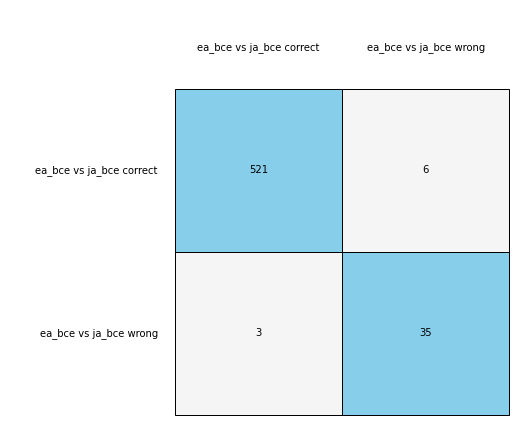

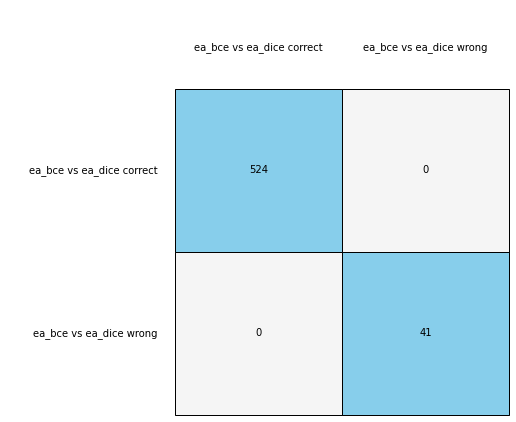

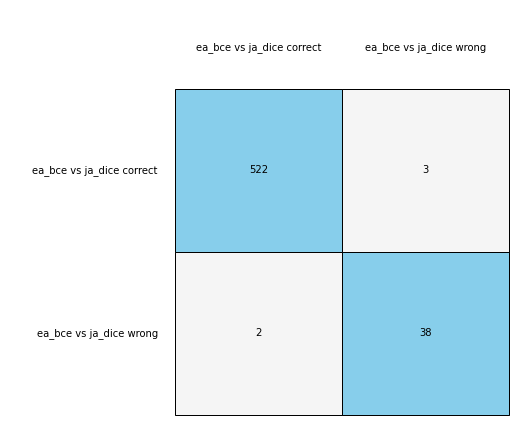

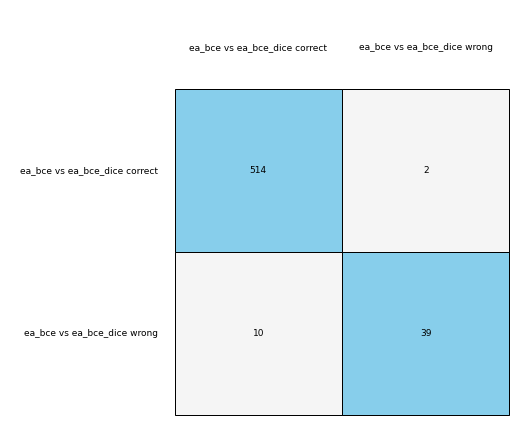

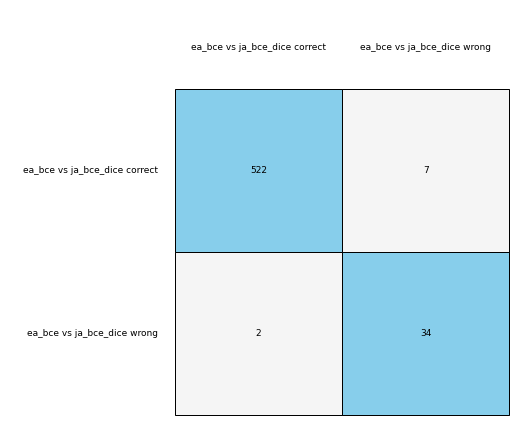

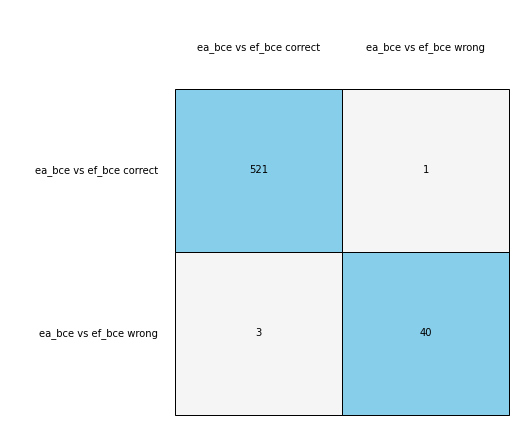

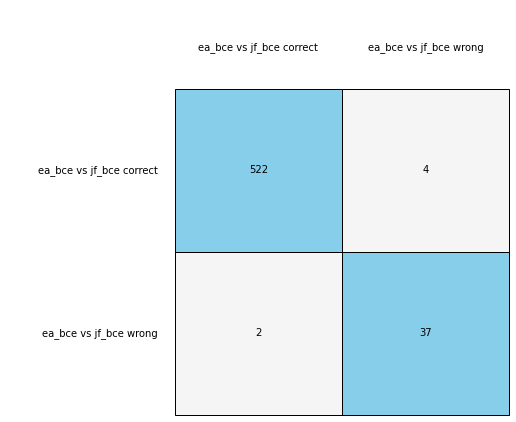

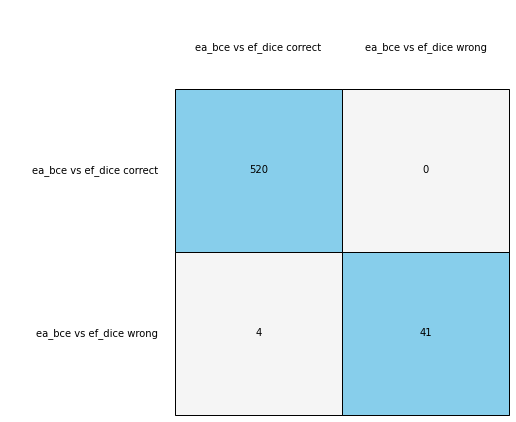

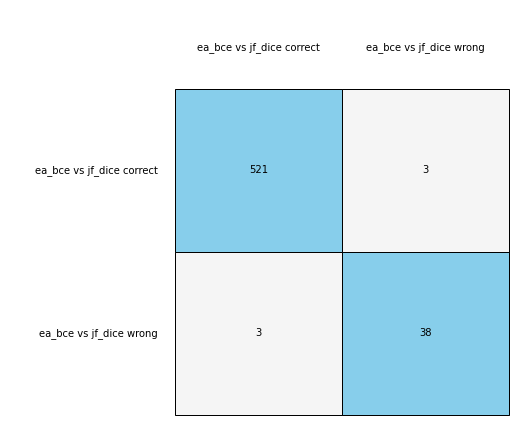

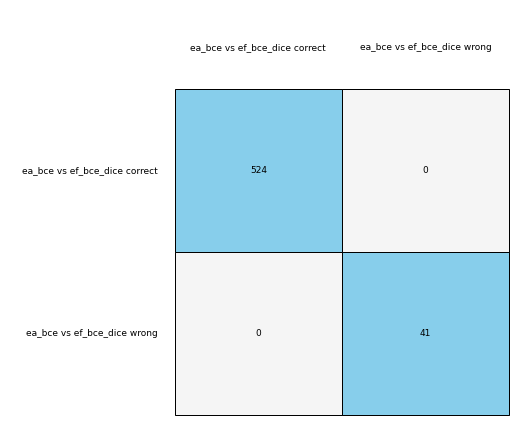

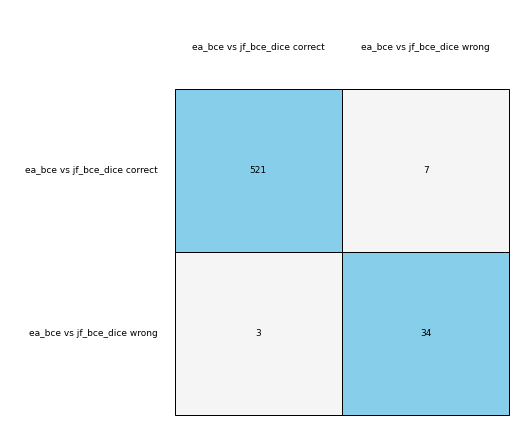

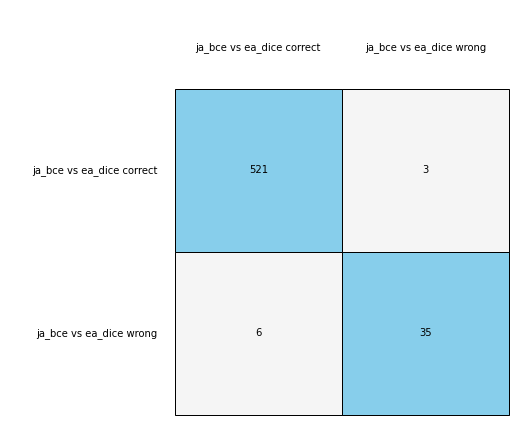

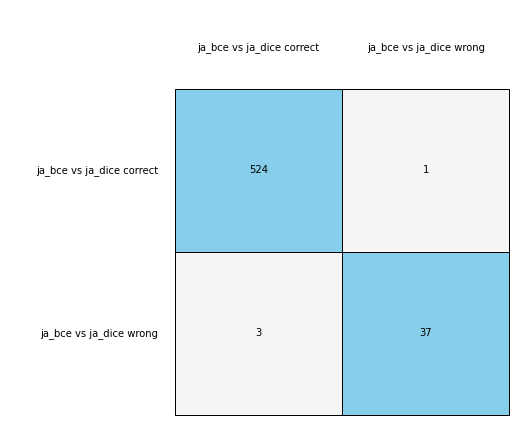

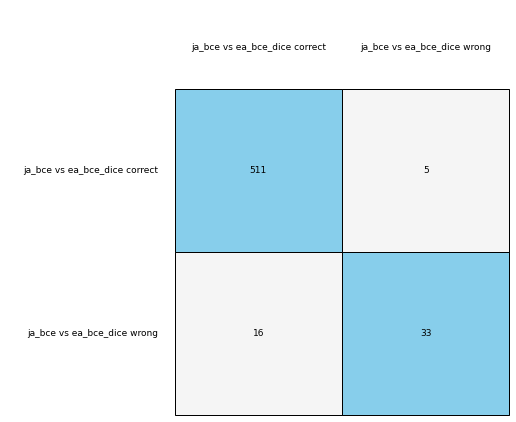

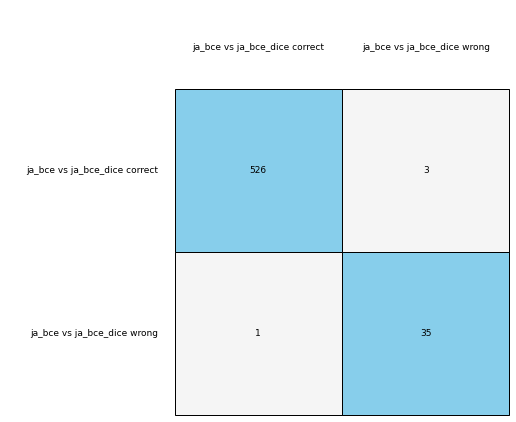

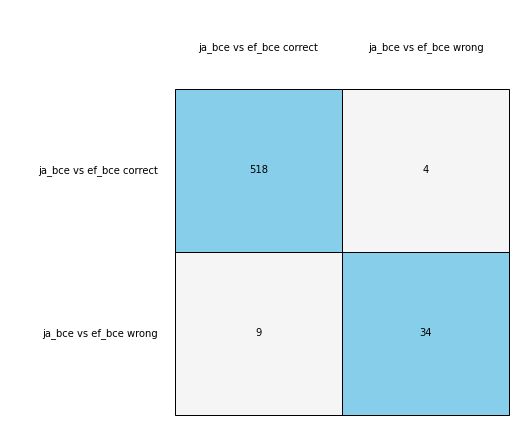

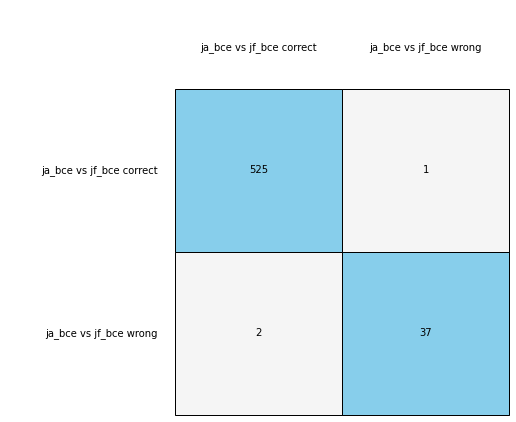

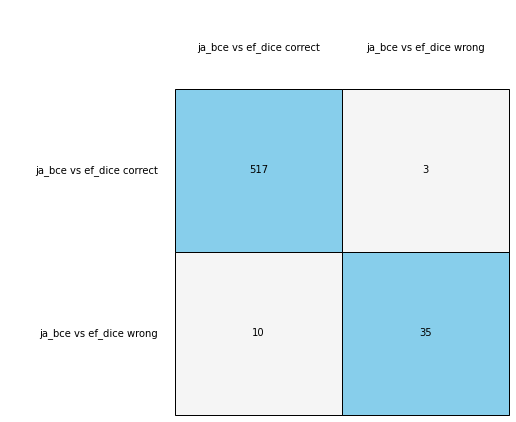

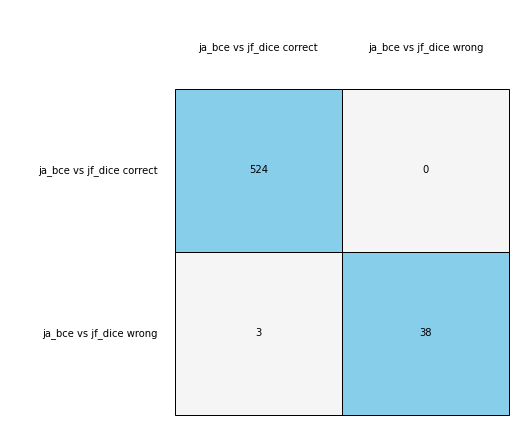

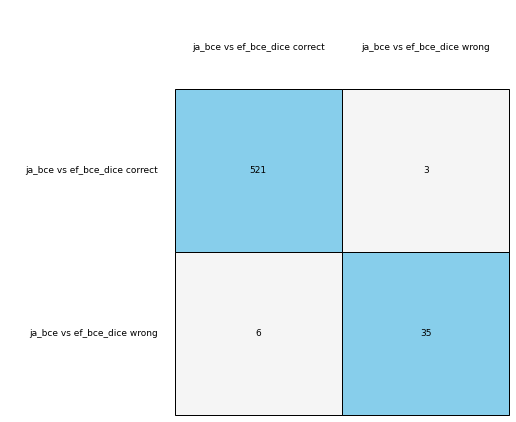

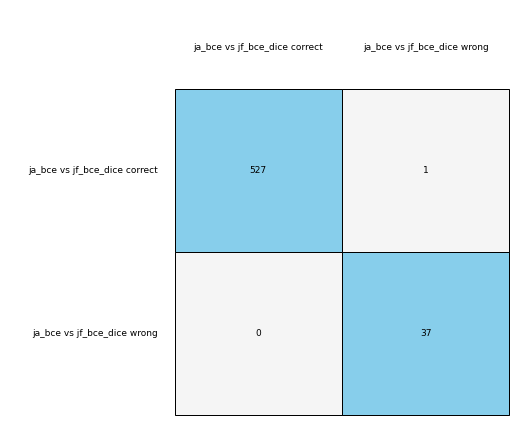

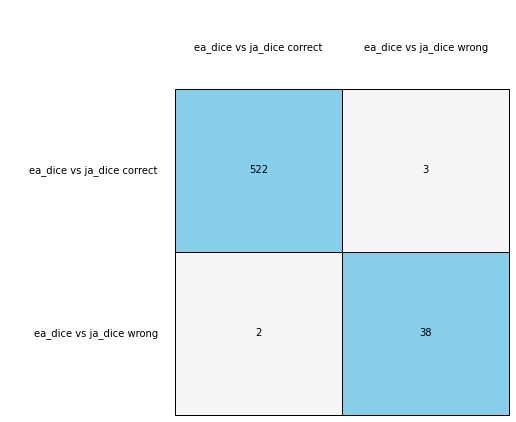

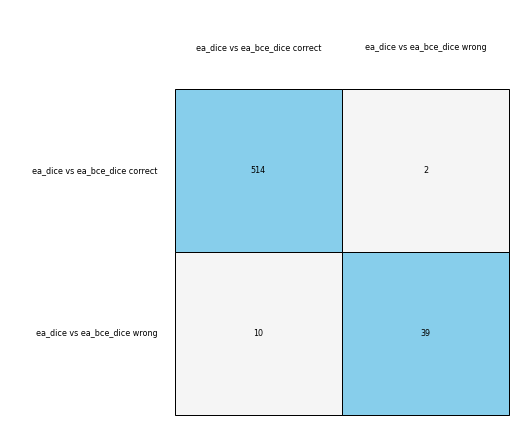

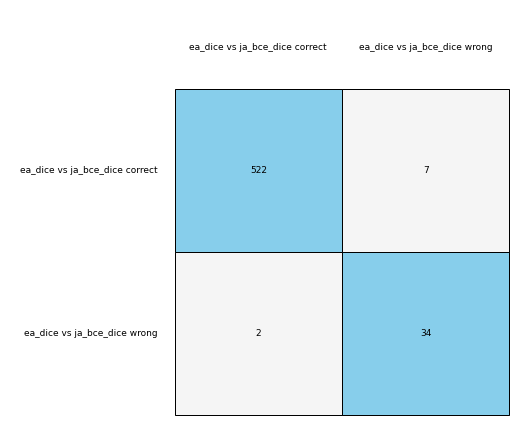

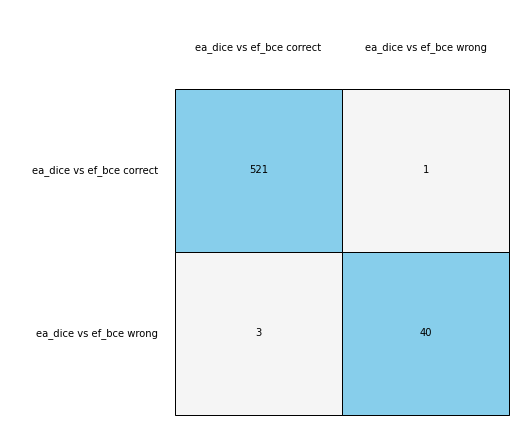

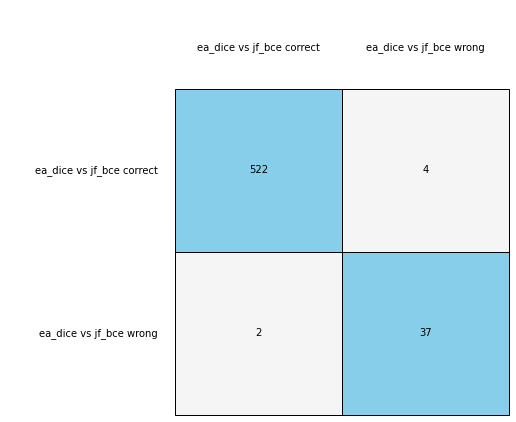

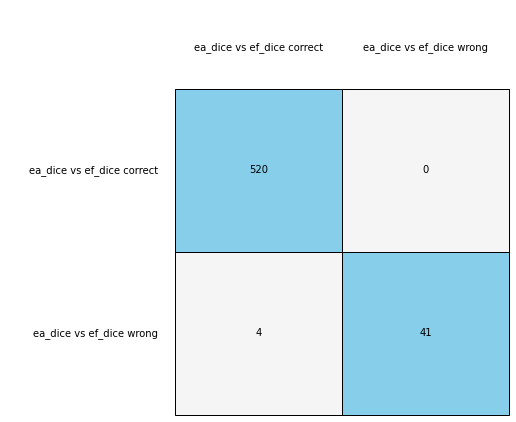

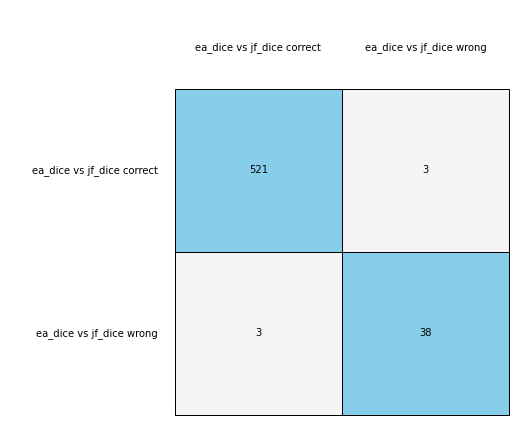

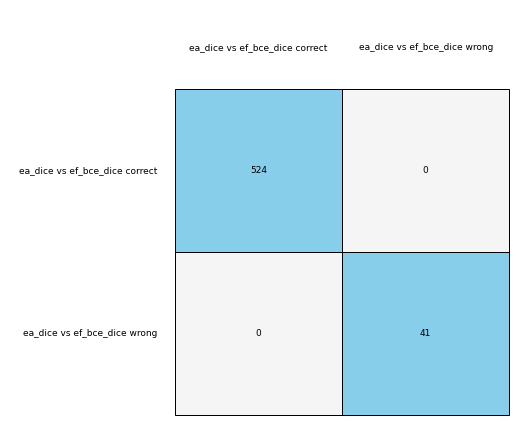

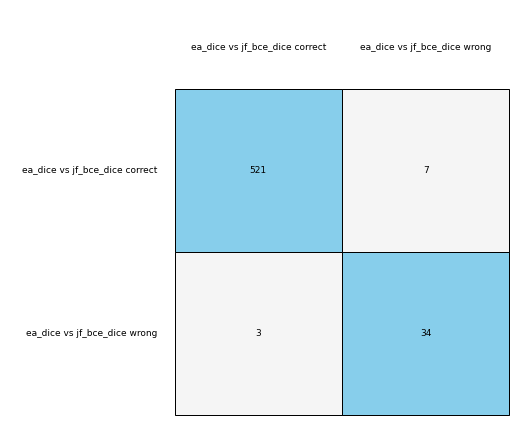

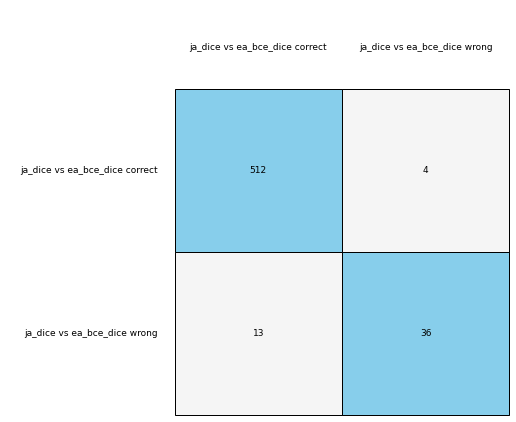

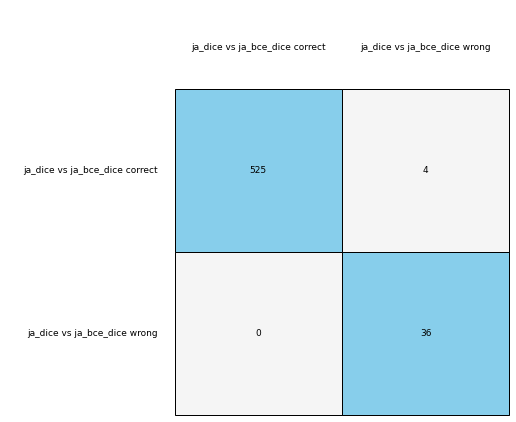

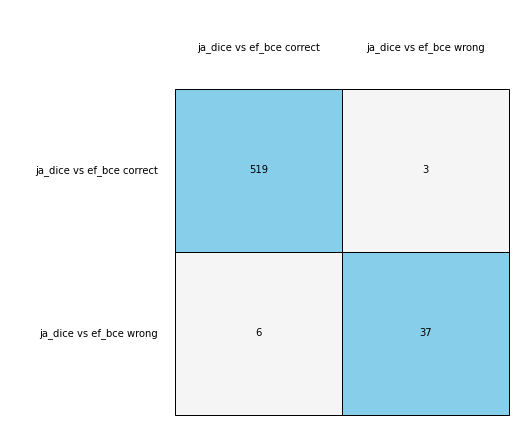

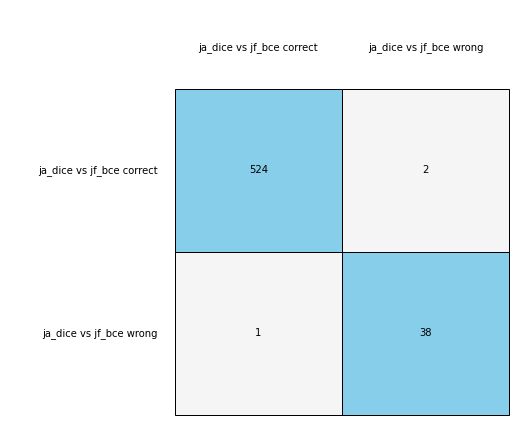

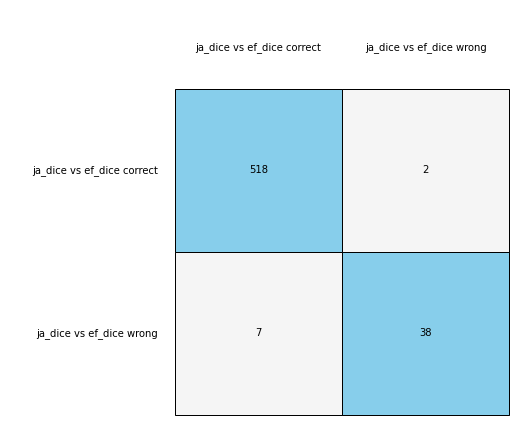

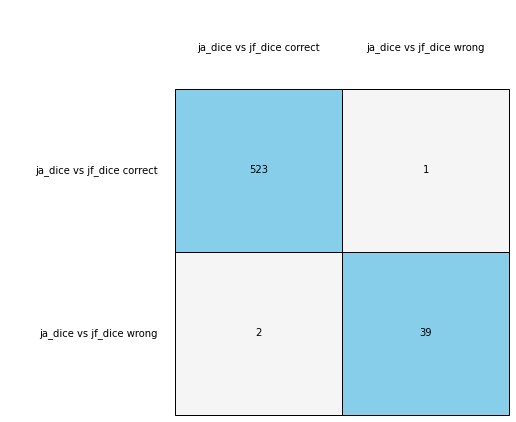

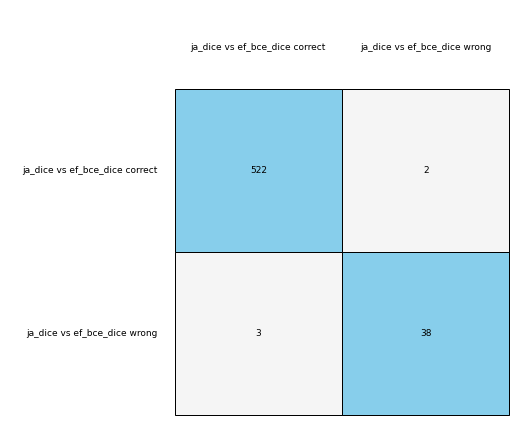

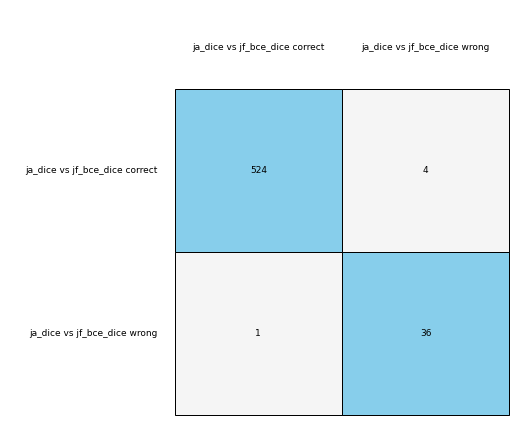

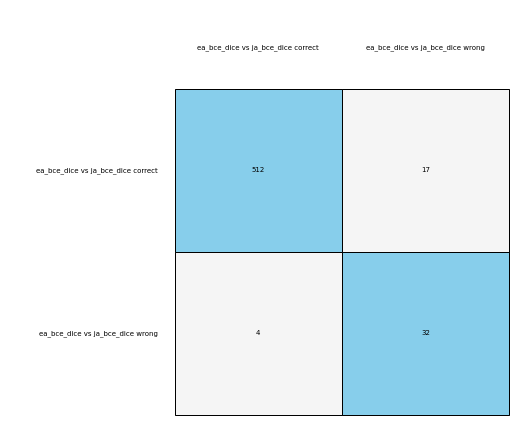

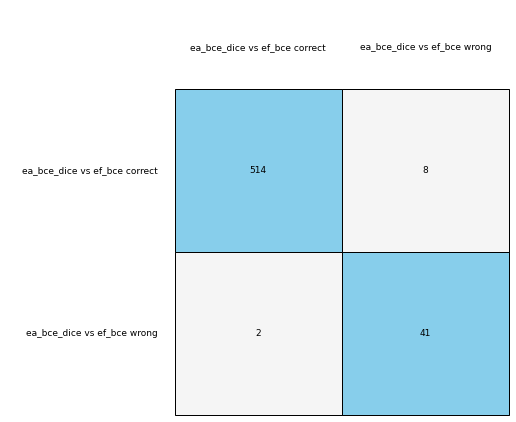

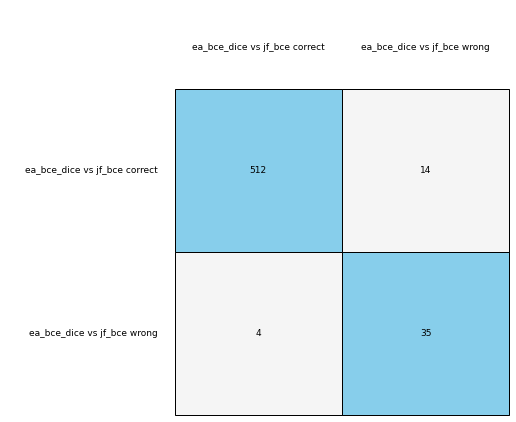

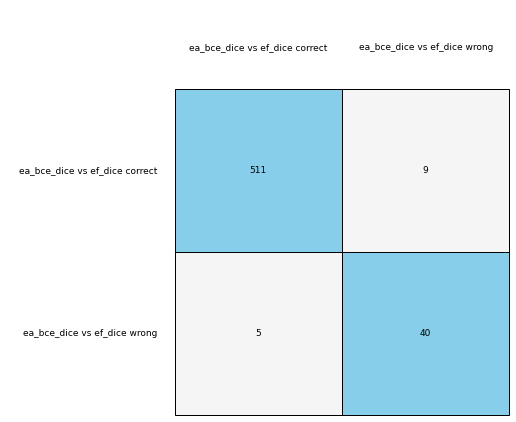

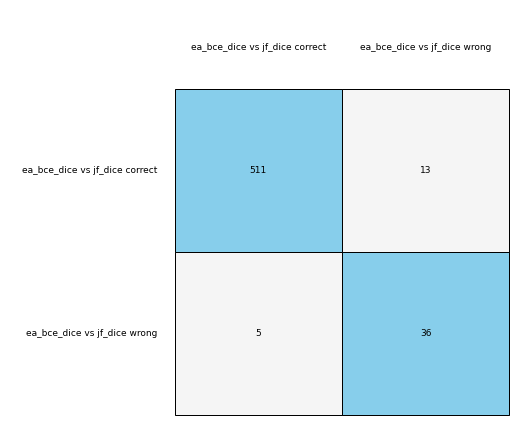

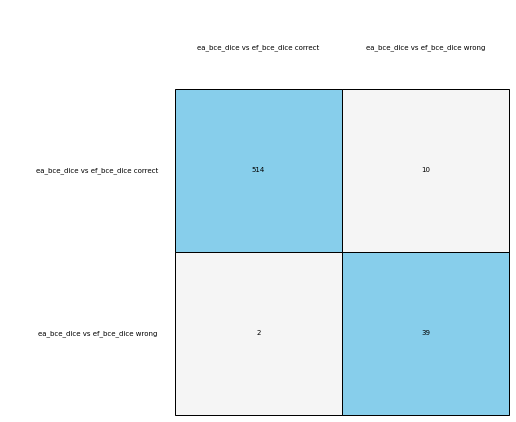

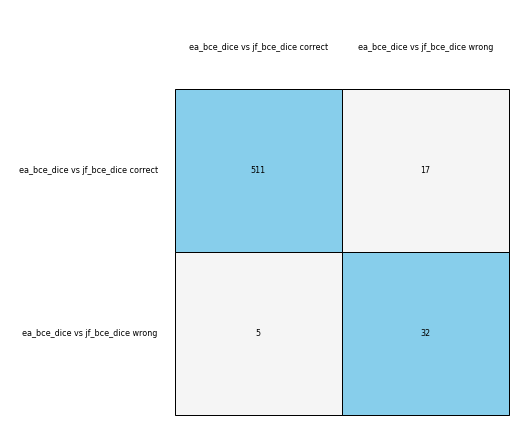

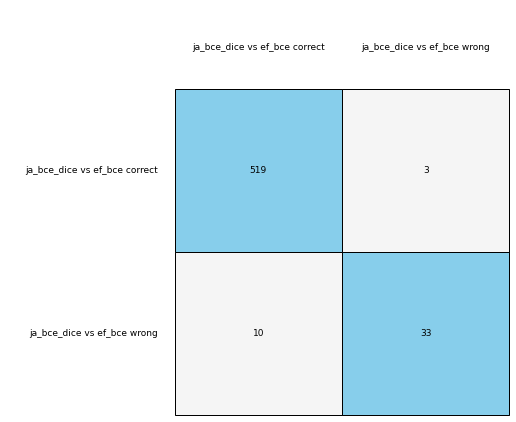

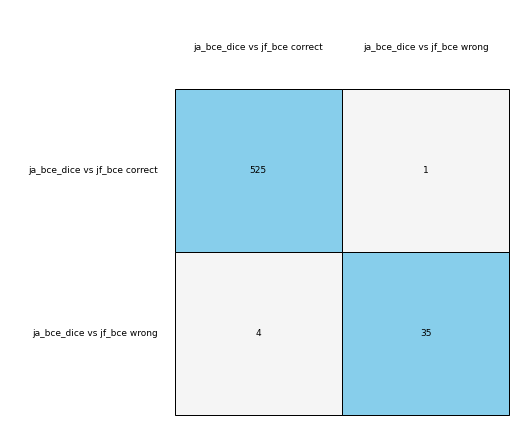

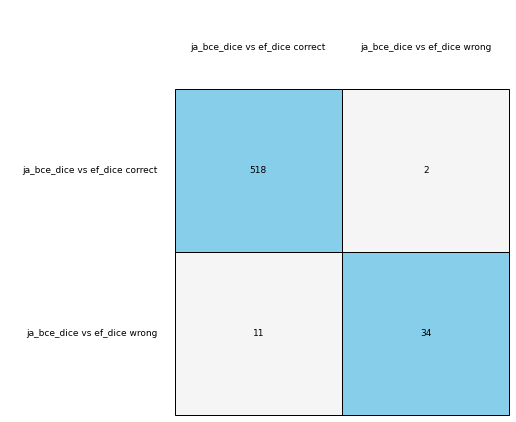

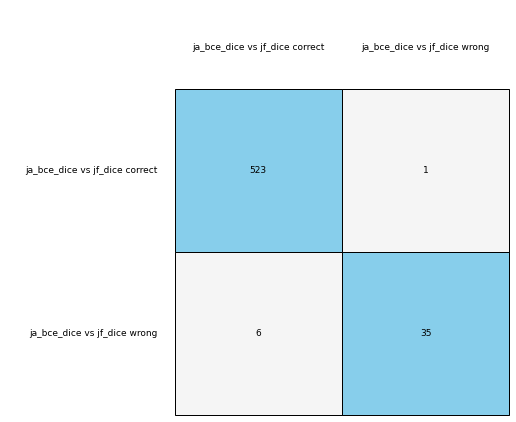

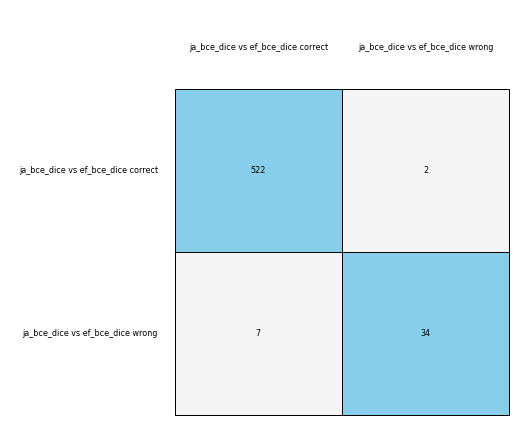

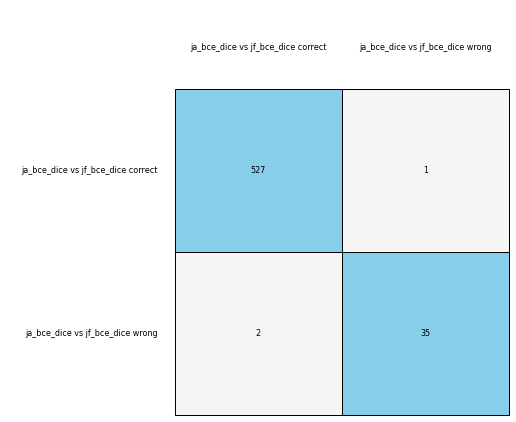

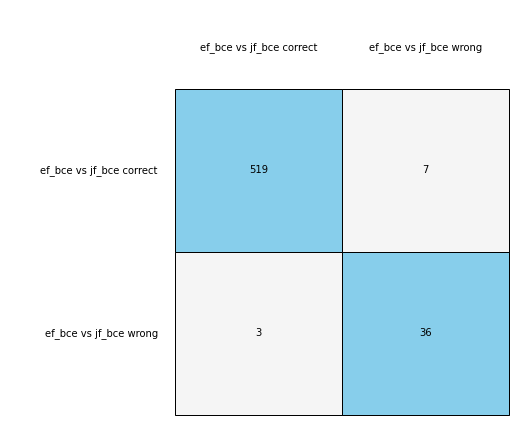

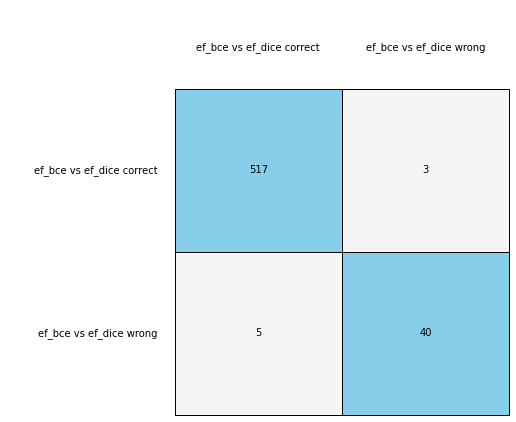

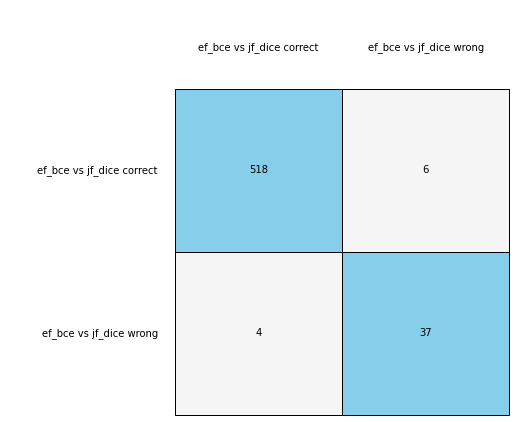

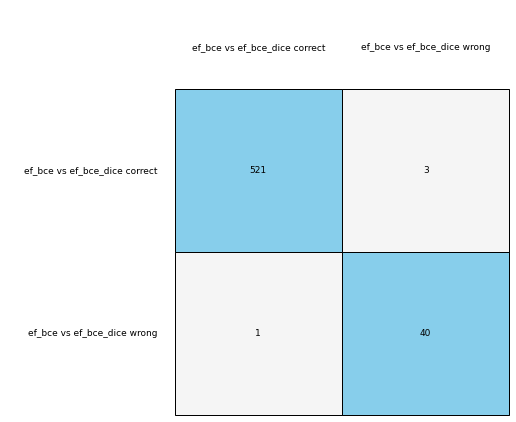

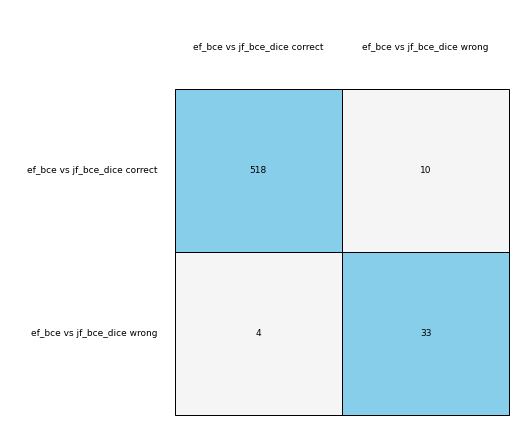

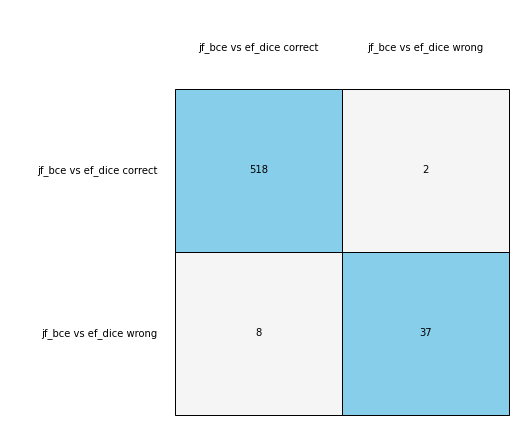

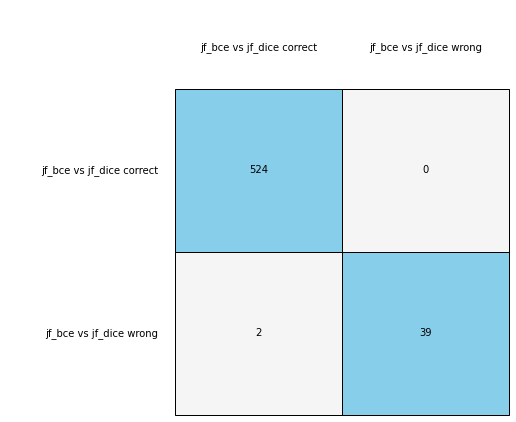

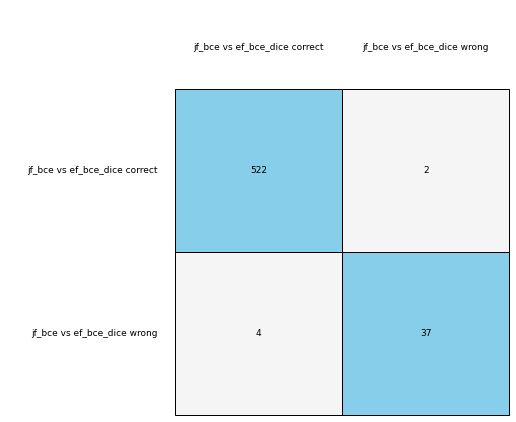

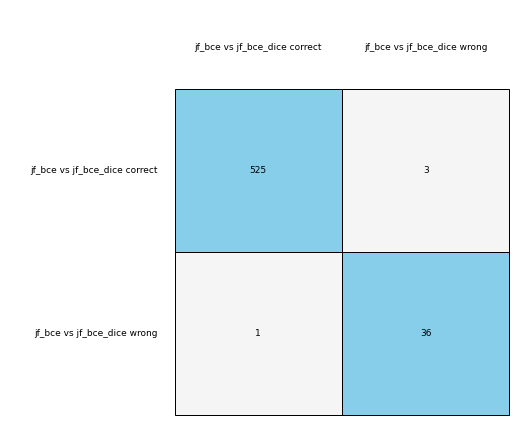

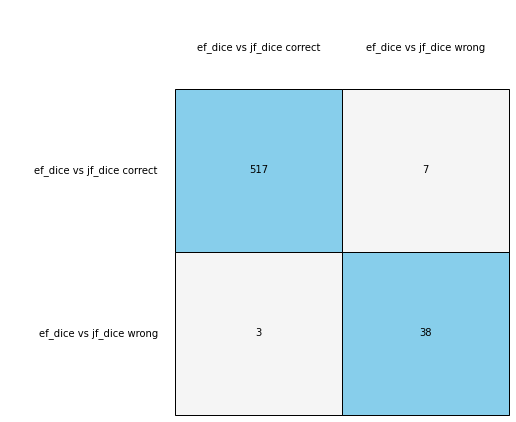

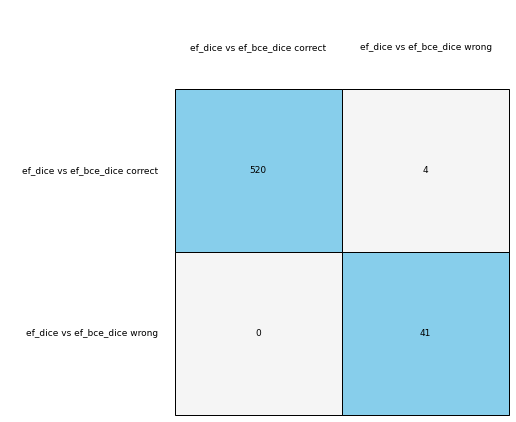

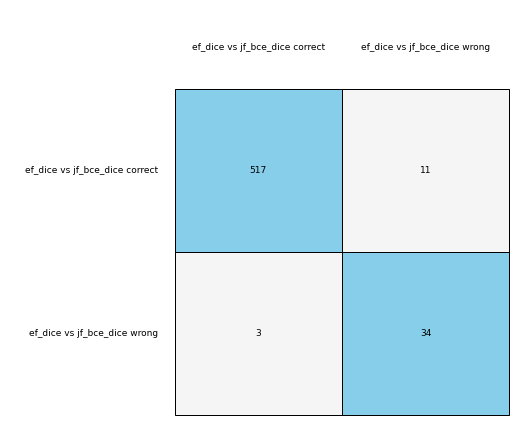

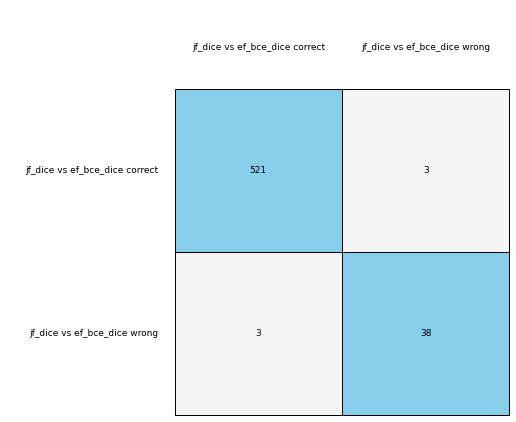

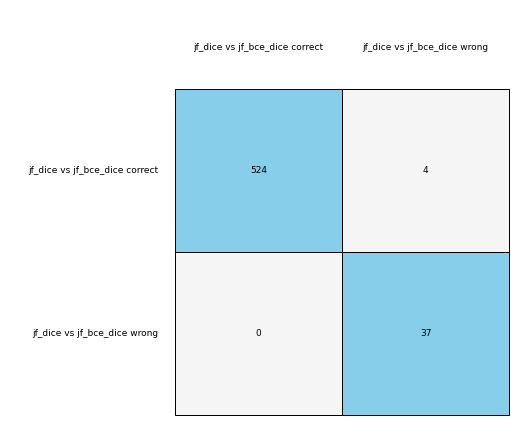

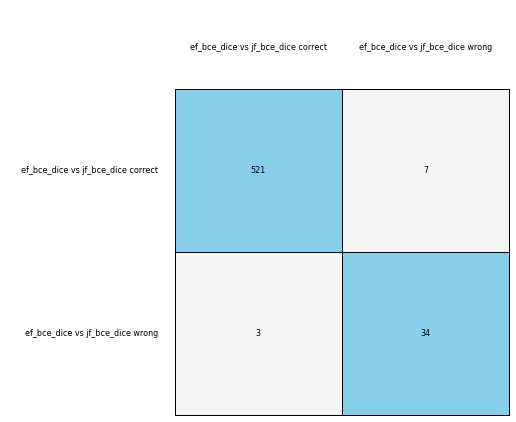

In [ ]:
for key, value in tb.items():
    # print(f'{key} \n {value}')
    checkerboard_plot(value,
                        figsize=(6, 6),
                        fmt='%d',
                        col_labels=[f'{key} correct', f'{key} wrong'],
                        row_labels=[f'{key} correct', f'{key} wrong'],
                        cell_colors=['skyblue', 'whitesmoke'],
                        font_colors=['black', 'black'],)

    
plt.show()


## Bimonial test   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom_test.html

In [ ]:
from scipy import stats

binom_test = stats.binom_test(531, n=564, p=0.5, alternative='greater')
print("binom_test:", binom_test)

binom_test: 4.849997099636956e-117


# Working below

In [ ]:
from mlxtend.evaluate import cochrans_q

q, p_value = cochrans_q(actual_all_planet_train.ravel(), 
                        ea_bce_modeled_all_train.ravel(),
                        ja_bce_modeled_all_train.ravel(),
                        )

print('Train: Q: %.3f' % q)
print('Train: p-value: %.3f' % p_value)

##############
print('##############')
# print(X_validation.ravel())
# print(y_validation.ravel())
# print(z_validation.ravel())

val_q, val_p_value = cochrans_q(actual_all_planet_validation.ravel(), 
                        ea_bce_modeled_all_validation.ravel(),
                        ja_bce_modeled_all_validation.ravel())

print('VALIDATION: Q: %.3f' % val_q)
print('VALIDATION: p-value: %.3f' % val_p_value)

NameError: ignored

In [ ]:
from mlxtend.evaluate import mcnemar_tables
from mlxtend.plotting import checkerboard_plot
import matplotlib.pyplot as plt
from mlxtend.plotting import checkerboard_plot

tb = mcnemar_tables(actual_all_planet_validation.ravel(), 
                    ea_bce_modeled_all_validation.ravel(), 
                    ja_bce_modeled_all_validation.ravel()) #### add the other 9 models here and make a multi-table output--http://rasbt.github.io/mlxtend/user_guide/evaluate/mcnemar_tables/

for key, value in tb.items():
    print(key, '\n', value, '\n')


model_0 vs model_1 
 [[51.  0.]
 [ 0.  5.]] 



[[51  0]
 [ 0  5]]


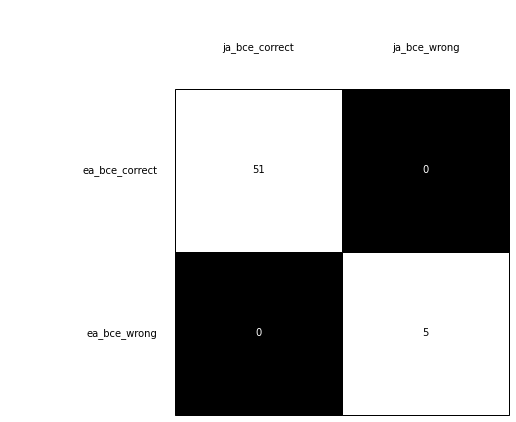

In [ ]:
from mlxtend.evaluate import mcnemar_table
from mlxtend.plotting import checkerboard_plot

tb = mcnemar_table(y_target=actual_all_planet_validation, 
                   y_model1=ea_bce_modeled_all_validation, 
                   y_model2=ja_bce_modeled_all_validation)


print(tb)

brd = checkerboard_plot(tb,
                        figsize=(6, 6),
                        fmt='%d',
                        col_labels=['ja_bce_correct', 'ja_bce_wrong'],
                        row_labels=['ea_bce_correct', 'ea_bce_wrong'],
                        cell_colors=['skyblue', 'whitesmoke'],
                        font_colors=['black', 'black'],)
plt.show()




In [ ]:
from mlxtend.evaluate import mcnemar

chi2, p = mcnemar(ary=tb, corrected=True,exact=True)
print('chi-squared:', chi2)
print('p-value:', p)

chi-squared: 0
p-value: 1.0
